# Course:  Convolutional Neural Networks for Image Classification

## Section-6
### Test trained CNNs models in Keras

**Description:**  
*Evaluate accuracy of every deep model on testing dataset  
Display confusion matrix*  

**File:** *testing.ipynb*

### Algorithm:

**--> Step 1:** Load saved CNN model  
**--> Step 2:** Load and assign best weights  
**--> Step 3: Predict with test dataset**  
**--> Step 4:** Build classification report & confusion matrix  
**--> Step 5:** Test on one image  


**Result:**  
- Accuracy results  
- Classification reports  
- Confusion matrices  
- Classified one image  
- Bar chart of classification  

## Importing libraries

In [1]:
# Importing needed libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import h5py
import cv2


from keras.models import load_model

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from timeit import default_timer as timer


## Setting up full paths

In [3]:
# Full or absolute path to 'Section2' with labels for CIFAR-10 dataset
# (!) On Windows, the path should look like following:
# r'C:\Users\your_name\PycharmProjects\CNNCourse\Section2'
# or:
# 'C:\\Users\\your_name\\PycharmProjects\\CNNCourse\\Section2'
full_path_to_Section2 = \
    'D:\Programming\Jupiter Notebook\CNNCourse\Section2'


# Full or absolute path to 'Section3' with labels for Traffic Signs dataset
# (!) On Windows, the path should look like following:
# r'C:\Users\your_name\PycharmProjects\CNNCourse\Section3'
# or:
# 'C:\\Users\\your_name\\PycharmProjects\\CNNCourse\\Section3'
full_path_to_Section3 = \
    'D:\Programming\Jupiter Notebook\CNNCourse\Section3'


# Full or absolute path to 'Section4' with preprocessed datasets
# (!) On Windows, the path should look like following:
# r'C:\Users\your_name\PycharmProjects\CNNCourse\Section4'
# or:
# 'C:\\Users\\your_name\\PycharmProjects\\CNNCourse\\Section4'
full_path_to_Section4 = \
    'D:\Programming\Jupiter Notebook\CNNCourse\Section4'


# Full or absolute path to 'Section5' with designed models
# (!) On Windows, the path should look like following:
# r'C:\Users\your_name\PycharmProjects\CNNCourse\Section5'
# or:
# 'C:\\Users\\your_name\\PycharmProjects\\CNNCourse\\Section5'
full_path_to_Section5 = \
    'D:\Programming\Jupiter Notebook\CNNCourse\Section5'


### Custom dataset, 1st model

## Step 1: Loading saved 1st model

In [ ]:
# Defining lists to collect models in
model_rgb = []
model_gray = []


# Loading 1st model for custom dataset
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
for i in range(2):
    model_rgb.append(load_model(full_path_to_Section5 + '/' + 
                                'custom' + '/' + 
                                'model_1_custom_rgb.h5'))
    
    model_gray.append(load_model(full_path_to_Section5 + '/' + 
                                 'custom' + '/' + 
                                 'model_1_custom_gray.h5'))


# Check point
print('Models are successfully loaded')


In [ ]:
# Showing models' input shapes
print(model_rgb[0].layers[0].input_shape)
print()
print(model_gray[0].layers[0].input_shape)


### Custom dataset, 1st model

## Step 2: Loading and assigning best weights

In [ ]:
# Preparing list with weights' names
weights = ['w_1_custom_rgb_255_mean.h5',
           'w_1_custom_rgb_255_mean_std.h5',
           'w_1_custom_gray_255_mean.h5',
           'w_1_custom_gray_255_mean_std.h5']


# Loading best weights for 1st model
for i in range(4):    
    # Checking if it is RGB model
    if i <= 1:
        # loading and assigning best weights
        # (!) On Windows, it might need to change
        # this: + '/' +
        # to this: + '\' +
        # or to this: + '\\' +
        model_rgb[i].load_weights('custom' + '/' + weights[i])
        
        
        # Check point
        print('Best weights for 1st RGB model are loaded and assigned  : ', weights[i])
    
    # Checking if it is GRAY model
    elif i >= 2:
        # loading and assigning best weights
        # (!) On Windows, it might need to change
        # this: + '/' +
        # to this: + '\' +
        # or to this: + '\\' +
        model_gray[i-2].load_weights('custom' + '/' + weights[i])
        
        
        # Check point
        print('Best weights for 1st GRAY model are loaded and assigned : ', weights[i])


### Custom dataset, 1st model

## Step 3: Predicting with test dataset

In [ ]:
# Preparing list with datasets' names
datasets = ['dataset_custom_rgb_255_mean.hdf5',
            'dataset_custom_rgb_255_mean_std.hdf5',
            'dataset_custom_gray_255_mean.hdf5',
            'dataset_custom_gray_255_mean_std.hdf5']


# Defining variable to identify the best model
accuracy_best = 0


# Testing 1st model with all custom datasets in a loop
for i in range(4):    
    # Opening saved custom dataset from HDF5 binary file
    # Initiating File object
    # Opening file in reading mode by 'r'
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    with h5py.File(full_path_to_Section4 + '/' + 'custom' + '/' + datasets[i], 'r') as f:
        # Extracting saved arrays for testing by appropriate keys
        # Saving them into new variables
        x_test = f['x_test']  # HDF5 dataset
        y_test = f['y_test']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_test = np.array(x_test)  # Numpy arrays
        y_test = np.array(y_test)  # Numpy arrays
    
    
    # Check point
    print('Dataset is opened :', datasets[i])
    
    
    # Check point
    # Showing shapes of loaded arrays
    if i == 0:
        print('x_test shape      :', x_test.shape)
        print('y_test shape      :', y_test.shape)
    
    
    # Checking if RGB dataset is opened
    if i <= 1:
        # Testing RGB model with current dataset
        temp = model_rgb[i].predict(x_test)
        
        
        # Check point
        # Showing prediction shape and scores
        if i == 0:
            print('prediction shape  :', temp.shape)  # (278, 5)
            print('prediction scores :', temp[0])  # 5 score numbers
        
        
        # Getting indexes of maximum values along specified axis
        temp = np.argmax(temp, axis=1)
        
        
        # Check point
        # Showing prediction shape after convertion
        # Showing predicted and correct indexes of classes
        if i == 0:
            print('prediction shape  :', temp.shape)  # (278,)
            print('predicted indexes :', temp[0:10])
            print('correct indexes   :', y_test[:10])
        
        
        # Calculating accuracy
        # We compare predicted class with correct class for all input images
        # By saying 'temp == y_test' we create Numpy array with True and False values
        # By function 'np.mean' we calculate mean value:
        # all_True / (all_True + all_False)
        accuracy = np.mean(temp == y_test)
        
        
        # Check point
        # Showing True and False matrix
        if i == 0:
            print('T and F matrix    :', (temp == y_test)[0:10])
        
        
        # Check point
        # Showing calculated accuracy
        print('Testing accuracy  : {0:.5f}'.format(accuracy))
        print()
        
    # Checking if GRAY dataset is opened
    elif i >= 2:
        # Testing GRAY model with current dataset
        temp = model_gray[i-2].predict(x_test)
        
        
        # Getting indexes of maximum values along specified axis
        temp = np.argmax(temp, axis=1)
        
        
        # Calculating accuracy
        # We compare predicted class with correct class for all input images
        # By saying 'temp == y_test' we create Numpy array with True and False values
        # By function 'np.mean' we calculate mean value:
        # all_True / (all_True + all_False)
        accuracy = np.mean(temp == y_test)
        
        
        # Check point
        # Showing calculated accuracy
        print('Testing accuracy  : {0:.5f}'.format(accuracy))
        print()
    
    
    # Identifying the best model
    # Saving predicted indexes of the best model
    if accuracy > accuracy_best:
        # Updating value of the best accuracy
        accuracy_best = accuracy
        
        # Saving predicted indexes of the best model into array
        # Updating array with predicted indexes of the best model
        y_predicted_best = temp
    

### Custom dataset, 1st model

## Step 4: Classification report & Confusion matrix

- **TP (True Positive)** is a number of **right predictions** that are **correct**  
when label is **True** *and* predicted as **True**  
  
  
- **TN (True Negative)** is a number of **right predictions** that are **incorrect**  
when label is **False** *and* predicted as **False**  
  
  
- **FP (False Positive)** is a number of **not right predictions** that are **incorrect**  
when label is **False** *but* predicted as **True**  
  
  
- **FN (False Negative)** is a number of **not right predictions** that are **correct**  
when label is **True** *but* predicted as **False**  
  
  
- **Precision**  is an accuracy of positive predictions  
Precision represents **percent of correct predictions**  
In other words, it is **ability not to label** an image **as positive** that is actually **negative**   
Precision is calculated by following equation:  
Precision = TP / (TP + FP)  
  
  
- **Recall**  is a fraction of positive predictions among all True samples  
In other words, it is **ability to find all positive samples**  
Recall is calculated by following equation:  
Recall = TP / (TP + FN)  
  
  
- **F1-score**  is a so called **weighted harmonic mean of the Precision and Recall**  
F1-score also known as balanced F-score or F-measure,  
as it incorporates Precision and Recall into computation,  
and, therefore, contributions of Precision and Recall to F1-score are equal  
F1-score reaches its best value at 1 and worst score at 0  
F1-score is calculated by following equation:  
F1-score = 2 * (Recall * Precision) / (Recall + Precision)  
  
  
- **Support** is a number of occurrences of each class in a dataset  
  
  
- **Accuracy** is a global accuracy of entire classifier  
Accuracy is calculated by following equation:  
Accuracy = (TP + TN) / (TP + TN + FP + FN)  
(all correct / all)  

  
- **macro avg** calculates the mean of the metrics,   
giving equal weight to each class  
  
  
- **weighted avg** calculates the weighted mean of the metrics  
It takes into account imbalance of samples' number for every class  
It weights every metric by occurrences of each class in a dataset  


In [ ]:
# Showing the main classification metrics of the best model
print(classification_report(y_test, y_predicted_best))


In [ ]:
# Confusion matrix is a two dimensional matrix that visualizes the performance,
# and makes it easy to see confusion between classes,
# by providing a picture of interrelation

# Each row represents a number of actual class
# Each column represents a number of predicted class


# Computing confusion matrix to evaluate accuracy of classification
c_m = confusion_matrix(y_test, y_predicted_best)

# Showing confusion matrix in form of Numpy array
print(c_m)


In [ ]:
# Preparing labels for custom dataset
labels_custom = ['Horse', 'Tiger', 'Cat', 'Dog', 'Polar bear']


# Check point
# Showing labels
print(labels_custom)


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20


# Implementing visualization of confusion matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels_custom)


# Plotting confusion matrix
# Setting colour map to be used
display_c_m.plot(cmap='OrRd', xticks_rotation=25)
# Other possible options for colour map are:
# 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Giving name to the plot
plt.title('Confusion Matrix: 1st model, Custom Dataset', fontsize=18)


# Saving plot
plt.savefig('confusion_matrix_model_1_custom_dataset.png', transparent=True, dpi=500)


# Showing the plot
plt.show()


### Custom dataset, 1st model

## Step 5: Testing on one image

In [ ]:
# Opening saved Mean Image for RGB custom dataset
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'custom' + 
               '/' + 'mean_rgb_dataset_custom.hdf5', 'r') as f:
    # Extracting saved array for Mean Image
    # Saving it into new variable
    mean_rgb = f['mean']  # HDF5 dataset
    # Converting it into Numpy array
    mean_rgb = np.array(mean_rgb)  # Numpy arrays


# Opening saved Standard Deviation for RGB custom dataset
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'custom' + '/' + 
               'std_rgb_dataset_custom.hdf5', 'r') as f:
    # Extracting saved array for Standard Deviation
    # Saving it into new variable
    std_rgb = f['std']  # HDF5 dataset
    # Converting it into Numpy array
    std_rgb = np.array(std_rgb)  # Numpy arrays


# Opening saved Mean Image for GRAY custom dataset
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'custom' + '/' + 
               'mean_gray_dataset_custom.hdf5', 'r') as f:
    # Extracting saved array for Mean Image
    # Saving it into new variable
    mean_gray = f['mean']  # HDF5 dataset
    # Converting it into Numpy array
    mean_gray = np.array(mean_gray)  # Numpy arrays


# Opening saved Standard Deviation for GRAY custom dataset
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'custom' + '/' + 
               'std_gray_dataset_custom.hdf5', 'r') as f:
    # Extracting saved array for Standard Deviation
    # Saving it into new variable
    std_gray = f['std']  # HDF5 dataset
    # Converting it into Numpy array
    std_gray = np.array(std_gray)  # Numpy arrays


# Check points
# Showing shapes of loaded Numpy arrays
print('RGB Mean Image          :', mean_rgb.shape)
print('RGB Standard Deviation  :', std_rgb.shape)
print('GRAY Mean Image         :', mean_gray.shape)
print('GRAY Standard Deviation :', std_gray.shape)


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (2.5, 2.5)



# Reading image by OpenCV library
# In this way image is opened already as Numpy array
# (!) OpenCV by default reads images in BGR order of channels
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
image_custom_bgr = cv2.imread('images_to_test' + '/' + 'custom_to_test_1.jpg')

# Swapping channels from BGR to RGB by OpenCV function
image_custom_rgb = cv2.cvtColor(image_custom_bgr, cv2.COLOR_BGR2RGB)

# Resizing image to 64 by 64 pixels size
image_custom_rgb = cv2.resize(image_custom_rgb,
                              (64, 64),
                              interpolation=cv2.INTER_CUBIC)

# Check point
# Showing loaded and resized image
plt.imshow(image_custom_rgb)
plt.show()



# Implementing normalization by dividing image's pixels on 255.0
image_custom_rgb_255 = image_custom_rgb / 255.0

# Implementing normalization by subtracting Mean Image
image_custom_rgb_255_mean = image_custom_rgb_255 - mean_rgb

# Implementing preprocessing by dividing on Standard Deviation
image_custom_rgb_255_mean_std = image_custom_rgb_255_mean / std_rgb

# Check points
# Showing shape of Numpy array with RGB image
# Showing some pixels' values
print('Shape of RGB image         :', image_custom_rgb.shape)
print('Pixels of RGB image        :', image_custom_rgb[:5, 0, 0])
print('RGB /255.0                 :', image_custom_rgb_255[:5, 0, 0])
print('RGB /255.0 => mean         :', image_custom_rgb_255_mean[:5, 0, 0])
print('RGB /255.0 => mean => std  :', image_custom_rgb_255_mean_std[:5, 0, 0])
print()



# Converting image to GRAY by OpenCV function
image_custom_gray = cv2.cvtColor(image_custom_rgb, cv2.COLOR_RGB2GRAY)

# Extending dimension from (height, width) to (height, width, one channel)
image_custom_gray = image_custom_gray[:, :, np.newaxis]

# Check point
# Showing converted into GRAY image
plt.imshow(image_custom_gray, cmap=plt.get_cmap('gray'))
plt.show()



# Implementing normalization by dividing image's pixels on 255.0
image_custom_gray_255 = image_custom_gray / 255.0

# Implementing normalization by subtracting Mean Image
image_custom_gray_255_mean = image_custom_gray_255 - mean_gray

# Implementing preprocessing by dividing on Standard Deviation
image_custom_gray_255_mean_std = image_custom_gray_255_mean / std_gray

# Check points
# Showing shape of Numpy array with GRAY image
# Showing some pixels' values
print('Shape of GRAY image        :', image_custom_gray.shape)
print('Pixels of GRAY image       :', image_custom_gray[:5, 0, 0])
print('GRAY /255.0                :', image_custom_gray_255[:5, 0, 0])
print('GRAY /255.0 => mean        :', image_custom_gray_255_mean[:5, 0, 0])
print('GRAY /255.0 => mean => std :', image_custom_gray_255_mean_std[:5, 0, 0])


In [ ]:
# Extending dimension from (height, width, channels) to (1, height, width, channels)
image_custom_rgb_255_mean = image_custom_rgb_255_mean[np.newaxis, :, :, :]
image_custom_rgb_255_mean_std = image_custom_rgb_255_mean_std[np.newaxis, :, :, :]

image_custom_gray_255_mean = image_custom_gray_255_mean[np.newaxis, :, :, :]
image_custom_gray_255_mean_std = image_custom_gray_255_mean_std[np.newaxis, :, :, :]

# Check points
# Showing shapes of extended Numpy arrays
print('RGB /255.0 => mean         :', image_custom_rgb_255_mean.shape)
print('RGB /255.0 => mean => std  :', image_custom_rgb_255_mean_std.shape)
print()
print('GRAY /255.0 => mean        :', image_custom_gray_255_mean.shape)
print('GRAY /255.0 => mean => std :', image_custom_gray_255_mean_std.shape)


In [4]:
# Defining function to plot bar chart with scores values
def bar_chart(scores, bar_title, show_xticks=True, labels=None):
    # Arranging X axis
    x_positions = np.arange(scores.size)

    # Creating bar chart
    barlist = plt.bar(x_positions, scores, align='center', alpha=0.6)

    # Highlighting the highest bar
    barlist[np.argmax(scores)].set_color('red')

    # Giving labels to bars along X axis
    if show_xticks:
        plt.xticks(x_positions, labels, rotation=20, fontsize=15)

    # Giving name to axes
    plt.xlabel('Class', fontsize=20)
    plt.ylabel('Value', fontsize=20)

    # Giving name to bar chart
    plt.title('Classification: ' + bar_title, fontsize=20)

    # Showing bar chart
    plt.show()


# Check point
print('Function to plot Bar Chart is successfully defined')


Function to plot Bar Chart is successfully defined


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12, 7)



# Testing RGB model trained on dataset: dataset_custom_rgb_255_mean.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_rgb[0].predict(image_custom_rgb_255_mean)
end = timer()

# Scores are given as 5 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_custom[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],          
          bar_title='1st RGB model, custom_rgb_255_mean',
          show_xticks=True,
          labels=labels_custom)



# Testing RGB model trained on dataset: dataset_custom_rgb_255_mean_std.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_rgb[1].predict(image_custom_rgb_255_mean_std)
end = timer()

# Scores are given as 5 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_custom[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='1st RGB model, custom_rgb_255_mean_std',
          show_xticks=True,
          labels=labels_custom)



# Testing GRAY model trained on dataset: dataset_custom_gray_255_mean.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_gray[0].predict(image_custom_gray_255_mean)
end = timer()

# Scores are given as 5 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_custom[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],          
          bar_title='1st GRAY model, custom_gray_255_mean',
          show_xticks=True,
          labels=labels_custom)



# Testing GRAY model trained on dataset: dataset_custom_gray_255_mean_std.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_gray[1].predict(image_custom_gray_255_mean_std)
end = timer()

# Scores are given as 5 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_custom[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],          
          bar_title='1st GRAY model, custom_gray_255_mean_std',
          show_xticks=True,
          labels=labels_custom)


### Custom dataset, 2nd model

## Step 1: Loading saved 2nd model

In [ ]:
# Defining lists to collect models in
model_rgb = []
model_gray = []


# Loading 2nd model for custom dataset
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
for i in range(2):
    model_rgb.append(load_model(full_path_to_Section5 + '/' + 
                                'custom' + '/' + 
                                'model_2_custom_rgb.h5'))
    
    model_gray.append(load_model(full_path_to_Section5 + '/' + 
                                 'custom' + '/' + 
                                 'model_2_custom_gray.h5'))


# Check point
print('Models are successfully loaded')


In [ ]:
# Showing models' input shapes
print(model_rgb[0].layers[0].input_shape)
print()
print(model_gray[0].layers[0].input_shape)


### Custom dataset, 2nd model

## Step 2: Loading and assigning best weights

In [ ]:
# Preparing list with weights' names
weights = ['w_2_custom_rgb_255_mean.h5',
           'w_2_custom_rgb_255_mean_std.h5',
           'w_2_custom_gray_255_mean.h5',
           'w_2_custom_gray_255_mean_std.h5']


# Loading best weights for 2nd model
for i in range(4):    
    # Checking if it is RGB model
    if i <= 1:
        # loading and assigning best weights
        # (!) On Windows, it might need to change
        # this: + '/' +
        # to this: + '\' +
        # or to this: + '\\' +
        model_rgb[i].load_weights('custom' + '/' + weights[i])
        
        
        # Check point
        print('Best weights for 2nd RGB model are loaded and assigned  : ', weights[i])
    
    # Checking if it is GRAY model
    elif i >= 2:
        # loading and assigning best weights
        # (!) On Windows, it might need to change
        # this: + '/' +
        # to this: + '\' +
        # or to this: + '\\' +
        model_gray[i-2].load_weights('custom' + '/' + weights[i])
        
        
        # Check point
        print('Best weights for 2nd GRAY model are loaded and assigned : ', weights[i])


### Custom dataset, 2nd model

## Step 3: Predicting with test dataset

In [ ]:
# Preparing list with datasets' names
datasets = ['dataset_custom_rgb_255_mean.hdf5',
            'dataset_custom_rgb_255_mean_std.hdf5',
            'dataset_custom_gray_255_mean.hdf5',
            'dataset_custom_gray_255_mean_std.hdf5']


# Defining variable to identify the best model
accuracy_best = 0


# Testing 2nd model with all custom datasets in a loop
for i in range(4):    
    # Opening saved custom dataset from HDF5 binary file
    # Initiating File object
    # Opening file in reading mode by 'r'
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    with h5py.File(full_path_to_Section4 + '/' + 'custom' + '/' + datasets[i], 'r') as f:
        # Extracting saved arrays for testing by appropriate keys
        # Saving them into new variables
        x_test = f['x_test']  # HDF5 dataset
        y_test = f['y_test']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_test = np.array(x_test)  # Numpy arrays
        y_test = np.array(y_test)  # Numpy arrays
    
    
    # Check point
    print('Dataset is opened :', datasets[i])
    
    
    # Check point
    # Showing shapes of loaded arrays
    if i == 0:
        print('x_test shape      :', x_test.shape)
        print('y_test shape      :', y_test.shape)
       
    
    # Checking if RGB dataset is opened
    if i <= 1:
        # Testing RGB model with current dataset
        temp = model_rgb[i].predict(x_test)
        
        
        # Check point
        # Showing prediction shape and scores
        if i == 0:
            print('prediction shape  :', temp.shape)  # (278, 5)
            print('prediction scores :', temp[0])  # 5 score numbers
        
        
        # Getting indexes of maximum values along specified axis
        temp = np.argmax(temp, axis=1)
        
        
        # Check point
        # Showing prediction shape after convertion
        # Showing predicted and correct indexes of classes
        if i == 0:
            print('prediction shape  :', temp.shape)  # (278,)
            print('predicted indexes :', temp[0:10])
            print('correct indexes   :', y_test[:10])
        
        
        # Calculating accuracy
        # We compare predicted class with correct class for all input images
        # By saying 'temp == y_test' we create Numpy array with True and False values
        # By function 'np.mean' we calculate mean value:
        # all_True / (all_True + all_False)
        accuracy = np.mean(temp == y_test)
        
        
        # Check point
        # Showing True and False matrix
        if i == 0:
            print('T and F matrix    :', (temp == y_test)[0:10])
        
        
        # Check point
        # Showing calculated accuracy
        print('Testing accuracy  : {0:.5f}'.format(accuracy))
        print()
    
    # Checking if GRAY dataset is opened
    elif i >= 2:
        # Testing GRAY model with current dataset
        temp = model_gray[i-2].predict(x_test)
        
        
        # Getting indexes of maximum values along specified axis
        temp = np.argmax(temp, axis=1)
        
        
        # Calculating accuracy
        # We compare predicted class with correct class for all input images
        # By saying 'temp == y_test' we create Numpy array with True and False values
        # By function 'np.mean' we calculate mean value:
        # all_True / (all_True + all_False)
        accuracy = np.mean(temp == y_test)
        
        
        # Check point
        # Showing calculated accuracy
        print('Testing accuracy  : {0:.5f}'.format(accuracy))
        print()
    
    
    # Identifying the best model
    # Saving predicted indexes of the best model
    if accuracy > accuracy_best:
        # Updating value of the best accuracy
        accuracy_best = accuracy
        
        # Saving predicted indexes of the best model into array
        # Updating array with predicted indexes of the best model
        y_predicted_best = temp
    

### Custom dataset, 2nd model

## Step 4: Classification report & Confusion matrix

- **TP (True Positive)** is a number of **right predictions** that are **correct**  
when label is **True** *and* predicted as **True**  
  
  
- **TN (True Negative)** is a number of **right predictions** that are **incorrect**  
when label is **False** *and* predicted as **False**  
  
  
- **FP (False Positive)** is a number of **not right predictions** that are **incorrect**  
when label is **False** *but* predicted as **True**  
  
  
- **FN (False Negative)** is a number of **not right predictions** that are **correct**  
when label is **True** *but* predicted as **False**  
  
  
- **Precision**  is an accuracy of positive predictions  
Precision represents **percent of correct predictions**  
In other words, it is **ability not to label** an image **as positive** that is actually **negative**   
Precision is calculated by following equation:  
Precision = TP / (TP + FP)  
  
  
- **Recall**  is a fraction of positive predictions among all True samples  
In other words, it is **ability to find all positive samples**  
Recall is calculated by following equation:  
Recall = TP / (TP + FN)  
  
  
- **F1-score**  is a so called **weighted harmonic mean of the Precision and Recall**  
F1-score also known as balanced F-score or F-measure,  
as it incorporates Precision and Recall into computation,  
and, therefore, contributions of Precision and Recall to F1-score are equal  
F1-score reaches its best value at 1 and worst score at 0  
F1-score is calculated by following equation:  
F1-score = 2 * (Recall * Precision) / (Recall + Precision)  
  
  
- **Support** is a number of occurrences of each class in a dataset  
  
  
- **Accuracy** is a global accuracy of entire classifier  
Accuracy is calculated by following equation:  
Accuracy = (TP + TN) / (TP + TN + FP + FN)  
(all correct / all)  

  
- **macro avg** calculates the mean of the metrics,   
giving equal weight to each class  
  
  
- **weighted avg** calculates the weighted mean of the metrics  
It takes into account imbalance of samples' number for every class  
It weights every metric by occurrences of each class in a dataset  


In [ ]:
# Showing the main classification metrics of the best model
print(classification_report(y_test, y_predicted_best))


In [ ]:
# Confusion matrix is a two dimensional matrix that visualizes the performance,
# and makes it easy to see confusion between classes,
# by providing a picture of interrelation

# Each row represents a number of actual class  
# Each column represents a number of predicted class  


# Computing confusion matrix to evaluate accuracy of classification
c_m = confusion_matrix(y_test, y_predicted_best)

# Showing confusion matrix in form of Numpy array
print(c_m)


In [ ]:
# Check point
# Showing labels
print(labels_custom)


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20


# Implementing visualization of confusion matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels_custom)


# Plotting confusion matrix
# Setting colour map to be used
display_c_m.plot(cmap='autumn_r', xticks_rotation=25)
# Other possible options for colour map are:
# 'OrRd', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Giving name to the plot
plt.title('Confusion Matrix: 2nd model, Custom Dataset', fontsize=20)


# Saving plot
plt.savefig('confusion_matrix_model_2_custom_dataset.png', transparent=True, dpi=500)


# Showing the plot
plt.show()


### Custom dataset, 2nd model

## Step 5: Testing on one image

In [ ]:
# Check points
# Showing shapes of loaded Numpy arrays of
# Mean Image and Standard Deviation
print('RGB Mean Image          :', mean_rgb.shape)
print('RGB Standard Deviation  :', std_rgb.shape)
print('GRAY Mean Image         :', mean_gray.shape)
print('GRAY Standard Deviation :', std_gray.shape)


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (2.5, 2.5)



# Reading image by OpenCV library
# In this way image is opened already as Numpy array
# (!) OpenCV by default reads images in BGR order of channels
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
image_custom_bgr = cv2.imread('images_to_test' + '/' + 'custom_to_test_2.jpg')

# Swapping channels from BGR to RGB by OpenCV function
image_custom_rgb = cv2.cvtColor(image_custom_bgr, cv2.COLOR_BGR2RGB)

# Resizing image to 64 by 64 pixels size
image_custom_rgb = cv2.resize(image_custom_rgb,
                              (64, 64),
                              interpolation=cv2.INTER_CUBIC)

# Check point
# Showing loaded and resized image
plt.imshow(image_custom_rgb)
plt.show()



# Implementing normalization by dividing image's pixels on 255.0
image_custom_rgb_255 = image_custom_rgb / 255.0

# Implementing normalization by subtracting Mean Image
image_custom_rgb_255_mean = image_custom_rgb_255 - mean_rgb

# Implementing preprocessing by dividing on Standard Deviation
image_custom_rgb_255_mean_std = image_custom_rgb_255_mean / std_rgb

# Check points
# Showing shape of Numpy array with RGB image
# Showing some pixels' values
print('Shape of RGB image         :', image_custom_rgb.shape)
print('Pixels of RGB image        :', image_custom_rgb[:5, 0, 0])
print('RGB /255.0                 :', image_custom_rgb_255[:5, 0, 0])
print('RGB /255.0 => mean         :', image_custom_rgb_255_mean[:5, 0, 0])
print('RGB /255.0 => mean => std  :', image_custom_rgb_255_mean_std[:5, 0, 0])
print()



# Converting image to GRAY by OpenCV function
image_custom_gray = cv2.cvtColor(image_custom_rgb, cv2.COLOR_RGB2GRAY)

# Extending dimension from (height, width) to (height, width, one channel)
image_custom_gray = image_custom_gray[:, :, np.newaxis]

# Check point
# Showing converted into GRAY image
plt.imshow(image_custom_gray, cmap=plt.get_cmap('gray'))
plt.show()



# Implementing normalization by dividing image's pixels on 255.0
image_custom_gray_255 = image_custom_gray / 255.0

# Implementing normalization by subtracting Mean Image
image_custom_gray_255_mean = image_custom_gray_255 - mean_gray

# Implementing preprocessing by dividing on Standard Deviation
image_custom_gray_255_mean_std = image_custom_gray_255_mean / std_gray

# Check points
# Showing shape of Numpy array with GRAY image
# Showing some pixels' values
print('Shape of GRAY image        :', image_custom_gray.shape)
print('Pixels of GRAY image       :', image_custom_gray[:5, 0, 0])
print('GRAY /255.0                :', image_custom_gray_255[:5, 0, 0])
print('GRAY /255.0 => mean        :', image_custom_gray_255_mean[:5, 0, 0])
print('GRAY /255.0 => mean => std :', image_custom_gray_255_mean_std[:5, 0, 0])


In [ ]:
# Extending dimension from (height, width, channels) to (1, height, width, channels)
image_custom_rgb_255_mean = image_custom_rgb_255_mean[np.newaxis, :, :, :]
image_custom_rgb_255_mean_std = image_custom_rgb_255_mean_std[np.newaxis, :, :, :]

image_custom_gray_255_mean = image_custom_gray_255_mean[np.newaxis, :, :, :]
image_custom_gray_255_mean_std = image_custom_gray_255_mean_std[np.newaxis, :, :, :]

# Check points
# Showing shapes of extended Numpy arrays
print('RGB /255.0 => mean         :', image_custom_rgb_255_mean.shape)
print('RGB /255.0 => mean => std  :', image_custom_rgb_255_mean_std.shape)
print()
print('GRAY /255.0 => mean        :', image_custom_gray_255_mean.shape)
print('GRAY /255.0 => mean => std :', image_custom_gray_255_mean_std.shape)


In [4]:
# Check point
# Showing information about created function
print(help(bar_chart))


Help on function bar_chart in module __main__:

bar_chart(scores, bar_title, show_xticks=True, labels=None)
    # Defining function to plot bar chart with scores values

None


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12, 7)



# Testing RGB model trained on dataset: dataset_custom_rgb_255_mean.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_rgb[0].predict(image_custom_rgb_255_mean)
end = timer()

# Scores are given as 5 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_custom[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='2nd RGB model, custom_rgb_255_mean',
          show_xticks=True,
          labels=labels_custom)



# Testing RGB model trained on dataset: dataset_custom_rgb_255_mean_std.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_rgb[1].predict(image_custom_rgb_255_mean_std)
end = timer()

# Scores are given as 5 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_custom[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='2nd RGB model, custom_rgb_255_mean_std',
          show_xticks=True,
          labels=labels_custom)



# Testing GRAY model trained on dataset: dataset_custom_gray_255_mean.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_gray[0].predict(image_custom_gray_255_mean)
end = timer()

# Scores are given as 5 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_custom[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='2nd GRAY model, custom_gray_255_mean',
          show_xticks=True,
          labels=labels_custom)



# Testing GRAY model trained on dataset: dataset_custom_gray_255_mean_std.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_gray[1].predict(image_custom_gray_255_mean_std)
end = timer()

# Scores are given as 5 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_custom[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='2nd GRAY model, custom_gray_255_mean_std',
          show_xticks=True,
          labels=labels_custom)


### CIFAR-10 dataset, 1st model

## Step 1: Loading saved 1st model

In [ ]:
# Defining lists to collect models in
model_rgb = []
model_gray = []


# Loading 1st model for CIFAR-10 dataset
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
for i in range(2):
    model_rgb.append(load_model(full_path_to_Section5 + '/' + 
                                'cifar10' + '/' + 
                                'model_1_cifar10_rgb.h5'))
    
    model_gray.append(load_model(full_path_to_Section5 + '/' + 
                                 'cifar10' + '/' + 
                                 'model_1_cifar10_gray.h5'))


# Check point
print('Models are successfully loaded')


In [ ]:
# Showing models' input shapes
print(model_rgb[0].layers[0].input_shape)
print()
print(model_gray[0].layers[0].input_shape)


### CIFAR-10 dataset, 1st model

## Step 2: Loading and assigning best weights

In [ ]:
# Preparing list with weights' names
weights = ['w_1_cifar10_rgb_255_mean.h5',
           'w_1_cifar10_rgb_255_mean_std.h5',
           'w_1_cifar10_gray_255_mean.h5',
           'w_1_cifar10_gray_255_mean_std.h5']


# Loading best weights for 1st model
for i in range(4):    
    # Checking if it is RGB model
    if i <= 1:
        # loading and assigning best weights
        # (!) On Windows, it might need to change
        # this: + '/' +
        # to this: + '\' +
        # or to this: + '\\' +
        model_rgb[i].load_weights('cifar10' + '/' + weights[i])
        
        
        # Check point
        print('Best weights for 1st RGB model are loaded and assigned  : ', weights[i])
    
    # Checking if it is GRAY model
    elif i >= 2:
        # loading and assigning best weights
        # (!) On Windows, it might need to change
        # this: + '/' +
        # to this: + '\' +
        # or to this: + '\\' +
        model_gray[i-2].load_weights('cifar10' + '/' + weights[i])
        
        
        # Check point
        print('Best weights for 1st GRAY model are loaded and assigned : ', weights[i])


### CIFAR-10 dataset, 1st model

## Step 3: Predicting with test dataset

In [ ]:
# Preparing list with datasets' names
datasets = ['dataset_cifar10_rgb_255_mean.hdf5',
            'dataset_cifar10_rgb_255_mean_std.hdf5',
            'dataset_cifar10_gray_255_mean.hdf5',
            'dataset_cifar10_gray_255_mean_std.hdf5']


# Defining variable to identify the best model
accuracy_best = 0


# Testing 1st model with all CIFAR-10 datasets in a loop
for i in range(4):    
    # Opening saved CIFAR-10 dataset from HDF5 binary file
    # Initiating File object
    # Opening file in reading mode by 'r'
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    with h5py.File(full_path_to_Section4 + '/' + 'cifar10' + '/' + datasets[i], 'r') as f:
        # Extracting saved arrays for testing by appropriate keys
        # Saving them into new variables
        x_test = f['x_test']  # HDF5 dataset
        y_test = f['y_test']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_test = np.array(x_test)  # Numpy arrays
        y_test = np.array(y_test)  # Numpy arrays
    
    
    # Check point
    print('Dataset is opened :', datasets[i])
    
    
    # Check point
    # Showing shapes of loaded arrays
    if i == 0:
        print('x_test shape      :', x_test.shape)
        print('y_test shape      :', y_test.shape)
    
    
    # Checking if RGB dataset is opened
    if i <= 1:
        # Testing RGB model with current dataset
        temp = model_rgb[i].predict(x_test)
        
        
        # Check point
        # Showing prediction shape and scores
        if i == 0:
            print('prediction shape  :', temp.shape)  # (10000, 10)
            print('prediction scores :', temp[0, 0:5])  # 5 score numbers
      
    
        # Getting indexes of maximum values along specified axis
        temp = np.argmax(temp, axis=1)
        
        
        # Check point
        # Showing prediction shape after convertion
        # Showing predicted and correct indexes of classes
        if i == 0:
            print('prediction shape  :', temp.shape)  # (10000,)
            print('predicted indexes :', temp[0:10])
            print('correct indexes   :', y_test[:10])
        
        
        # Calculating accuracy
        # We compare predicted class with correct class for all input images
        # By saying 'temp == y_test' we create Numpy array with True and False values
        # By function 'np.mean' we calculate mean value:
        # all_True / (all_True + all_False)
        accuracy = np.mean(temp == y_test)
        
        
        # Check point
        # Showing True and False matrix
        if i == 0:
            print('T and F matrix    :', (temp == y_test)[0:10])
        
        
        # Check point
        # Showing calculated accuracy
        print('Testing accuracy  : {0:.5f}'.format(accuracy))
        print()
    
    # Checking if GRAY dataset is opened
    elif i >= 2:
        # Testing GRAY model with current dataset
        temp = model_gray[i-2].predict(x_test)
        
        
        # Getting indexes of maximum values along specified axis
        temp = np.argmax(temp, axis=1)
        
        
        # Calculating accuracy
        # We compare predicted class with correct class for all input images
        # By saying 'temp == y_test' we create Numpy array with True and False values
        # By function 'np.mean' we calculate mean value:
        # all_True / (all_True + all_False)
        accuracy = np.mean(temp == y_test)
        
        
        # Check point
        # Showing calculated accuracy
        print('Testing accuracy  : {0:.5f}'.format(accuracy))
        print()
    
    
    # Identifying the best model
    # Saving predicted indexes of the best model
    if accuracy > accuracy_best:
        # Updating value of the best accuracy
        accuracy_best = accuracy
        
        # Saving predicted indexes of the best model into array
        # Updating array with predicted indexes of the best model
        y_predicted_best = temp
    

### CIFAR-10 dataset, 1st model

## Step 4: Classification report & Confusion matrix

- **TP (True Positive)** is a number of **right predictions** that are **correct**  
when label is **True** *and* predicted as **True**  
  
  
- **TN (True Negative)** is a number of **right predictions** that are **incorrect**  
when label is **False** *and* predicted as **False**  
  
  
- **FP (False Positive)** is a number of **not right predictions** that are **incorrect**  
when label is **False** *but* predicted as **True**  
  
  
- **FN (False Negative)** is a number of **not right predictions** that are **correct**  
when label is **True** *but* predicted as **False**  
  
  
- **Precision**  is an accuracy of positive predictions  
Precision represents **percent of correct predictions**  
In other words, it is **ability not to label** an image **as positive** that is actually **negative**   
Precision is calculated by following equation:  
Precision = TP / (TP + FP)  
  
  
- **Recall**  is a fraction of positive predictions among all True samples  
In other words, it is **ability to find all positive samples**  
Recall is calculated by following equation:  
Recall = TP / (TP + FN)  
  
  
- **F1-score**  is a so called **weighted harmonic mean of the Precision and Recall**  
F1-score also known as balanced F-score or F-measure,  
as it incorporates Precision and Recall into computation,  
and, therefore, contributions of Precision and Recall to F1-score are equal  
F1-score reaches its best value at 1 and worst score at 0  
F1-score is calculated by following equation:  
F1-score = 2 * (Recall * Precision) / (Recall + Precision)  
  
  
- **Support** is a number of occurrences of each class in a dataset  
  
  
- **Accuracy** is a global accuracy of entire classifier  
Accuracy is calculated by following equation:  
Accuracy = (TP + TN) / (TP + TN + FP + FN)  
(all correct / all)  

  
- **macro avg** calculates the mean of the metrics,   
giving equal weight to each class  
  
  
- **weighted avg** calculates the weighted mean of the metrics  
It takes into account imbalance of samples' number for every class  
It weights every metric by occurrences of each class in a dataset  


In [ ]:
# Showing the main classification metrics of the best model
print(classification_report(y_test, y_predicted_best))


In [ ]:
# Confusion matrix is a two dimensional matrix that visualizes the performance,
# and makes it easy to see confusion between classes,
# by providing a picture of interrelation

# Each row represents a number of actual class  
# Each column represents a number of predicted class  


# Computing confusion matrix to evaluate accuracy of classification
c_m = confusion_matrix(y_test, y_predicted_best)

# Showing confusion matrix in form of Numpy array
print(c_m)


In [ ]:
# Preparing labels for CIFAR-10 dataset
# Getting Pandas dataFrame from txt file with labels
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
labels_cifar10 = pd.read_csv(full_path_to_Section2 + '/' + 
                             'cifar10' + '/' + 
                             'batches.meta.txt', header=None)


# Check point
# Showing first 5 elements of the dataFrame
print(labels_cifar10.head())
print()


# Converting into Numpy array
labels_cifar10 = np.array(labels_cifar10).flatten()


# Check point
# Showing Numpy array with labels
print(labels_cifar10)


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20


# Implementing visualization of confusion matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels_cifar10)


# Plotting confusion matrix
# Setting colour map to be used
display_c_m.plot(cmap='Blues', xticks_rotation=35)
# Other possible options for colour map are:
# 'OrRd', 'autumn_r', 'cool', 'Greens', 'Greys', 'PuRd', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Giving name to the plot
plt.title('Confusion Matrix: 1st model, CIFAR-10 Dataset', fontsize=18)


# Saving plot
plt.savefig('confusion_matrix_model_1_cifar10_dataset.png', transparent=True, dpi=500)


# Showing the plot
plt.show()


### CIFAR-10 dataset, 1st model

## Step 5: Testing on one image

In [ ]:
# Opening saved Mean Image for RGB CIFAR-10 dataset
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'cifar10' + '/' + 
               'mean_rgb_dataset_cifar10.hdf5', 'r') as f:
    # Extracting saved array for Mean Image
    # Saving it into new variable
    mean_rgb = f['mean']  # HDF5 dataset
    # Converting it into Numpy array
    mean_rgb = np.array(mean_rgb)  # Numpy arrays


# Opening saved Standard Deviation for RGB CIFAR-10 dataset
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'cifar10' + '/' + 
               'std_rgb_dataset_cifar10.hdf5', 'r') as f:
    # Extracting saved array for Standard Deviation
    # Saving it into new variable
    std_rgb = f['std']  # HDF5 dataset
    # Converting it into Numpy array
    std_rgb = np.array(std_rgb)  # Numpy arrays


# Opening saved Mean Image for GRAY CIFAR-10 dataset
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'cifar10' + '/' + 
               'mean_gray_dataset_cifar10.hdf5', 'r') as f:
    # Extracting saved array for Mean Image
    # Saving it into new variable
    mean_gray = f['mean']  # HDF5 dataset
    # Converting it into Numpy array
    mean_gray = np.array(mean_gray)  # Numpy arrays


# Opening saved Standard Deviation for GRAY CIFAR-10 dataset
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'cifar10' + '/' + 
               'std_gray_dataset_cifar10.hdf5', 'r') as f:
    # Extracting saved array for Standard Deviation
    # Saving it into new variable
    std_gray = f['std']  # HDF5 dataset
    # Converting it into Numpy array
    std_gray = np.array(std_gray)  # Numpy arrays


# Check points
# Showing shapes of loaded Numpy arrays
print('RGB Mean Image          :', mean_rgb.shape)
print('RGB Standard Deviation  :', std_rgb.shape)
print('GRAY Mean Image         :', mean_gray.shape)
print('GRAY Standard Deviation :', std_gray.shape)


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (2.5, 2.5)



# Reading image by OpenCV library
# In this way image is opened already as Numpy array
# (!) OpenCV by default reads images in BGR order of channels
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
image_cifar10_bgr = cv2.imread('images_to_test' + '/' + 'cifar10_to_test_1.jpg')

# Swapping channels from BGR to RGB by OpenCV function
image_cifar10_rgb = cv2.cvtColor(image_cifar10_bgr, cv2.COLOR_BGR2RGB)

# Resizing image to 32 by 32 pixels size
image_cifar10_rgb = cv2.resize(image_cifar10_rgb,
                              (32, 32),
                              interpolation=cv2.INTER_CUBIC)

# Check point
# Showing loaded and resized image
plt.imshow(image_cifar10_rgb)
plt.show()



# Implementing normalization by dividing image's pixels on 255.0
image_cifar10_rgb_255 = image_cifar10_rgb / 255.0

# Implementing normalization by subtracting Mean Image
image_cifar10_rgb_255_mean = image_cifar10_rgb_255 - mean_rgb

# Implementing preprocessing by dividing on Standard Deviation
image_cifar10_rgb_255_mean_std = image_cifar10_rgb_255_mean / std_rgb

# Check points
# Showing shape of Numpy array with RGB image
# Showing some pixels' values
print('Shape of RGB image         :', image_cifar10_rgb.shape)
print('Pixels of RGB image        :', image_cifar10_rgb[:5, 0, 0])
print('RGB /255.0                 :', image_cifar10_rgb_255[:5, 0, 0])
print('RGB /255.0 => mean         :', image_cifar10_rgb_255_mean[:5, 0, 0])
print('RGB /255.0 => mean => std  :', image_cifar10_rgb_255_mean_std[:5, 0, 0])
print()



# Converting image to GRAY by OpenCV function
image_cifar10_gray = cv2.cvtColor(image_cifar10_rgb, cv2.COLOR_RGB2GRAY)

# Extending dimension from (height, width) to (height, width, one channel)
image_cifar10_gray = image_cifar10_gray[:, :, np.newaxis]

# Check point
# Showing converted into GRAY image
plt.imshow(image_cifar10_gray, cmap=plt.get_cmap('gray'))
plt.show()



# Implementing normalization by dividing image's pixels on 255.0
image_cifar10_gray_255 = image_cifar10_gray / 255.0

# Implementing normalization by subtracting Mean Image
image_cifar10_gray_255_mean = image_cifar10_gray_255 - mean_gray

# Implementing preprocessing by dividing on Standard Deviation
image_cifar10_gray_255_mean_std = image_cifar10_gray_255_mean / std_gray

# Check points
# Showing shape of Numpy array with GRAY image
# Showing some pixels' values
print('Shape of GRAY image        :', image_cifar10_gray.shape)
print('Pixels of GRAY image       :', image_cifar10_gray[:5, 0, 0])
print('GRAY /255.0                :', image_cifar10_gray_255[:5, 0, 0])
print('GRAY /255.0 => mean        :', image_cifar10_gray_255_mean[:5, 0, 0])
print('GRAY /255.0 => mean => std :', image_cifar10_gray_255_mean_std[:5, 0, 0])


In [ ]:
# Extending dimension from (height, width, channels) to (1, height, width, channels)
image_cifar10_rgb_255_mean = image_cifar10_rgb_255_mean[np.newaxis, :, :, :]
image_cifar10_rgb_255_mean_std = image_cifar10_rgb_255_mean_std[np.newaxis, :, :, :]

image_cifar10_gray_255_mean = image_cifar10_gray_255_mean[np.newaxis, :, :, :]
image_cifar10_gray_255_mean_std = image_cifar10_gray_255_mean_std[np.newaxis, :, :, :]

# Check points
# Showing shapes of extended Numpy arrays
print('RGB /255.0 => mean         :', image_cifar10_rgb_255_mean.shape)
print('RGB /255.0 => mean => std  :', image_cifar10_rgb_255_mean_std.shape)
print()
print('GRAY /255.0 => mean        :', image_cifar10_gray_255_mean.shape)
print('GRAY /255.0 => mean => std :', image_cifar10_gray_255_mean_std.shape)


In [ ]:
# Check point
# Showing information about created function
print(help(bar_chart))


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12, 7)



# Testing RGB model trained on dataset: dataset_cifar10_rgb_255_mean.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_rgb[0].predict(image_cifar10_rgb_255_mean)
end = timer()

# Scores are given as 10 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0, 0:5])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_cifar10[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='1st RGB model, cifar10_rgb_255_mean',
          show_xticks=True,
          labels=labels_cifar10)



# Testing RGB model trained on dataset: dataset_cifar10_rgb_255_mean_std.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_rgb[1].predict(image_cifar10_rgb_255_mean_std)
end = timer()

# Scores are given as 10 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0, 0:5])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_cifar10[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='1st RGB model, cifar10_rgb_255_mean_std',
          show_xticks=True,
          labels=labels_cifar10)



# Testing GRAY model trained on dataset: dataset_cifar10_gray_255_mean.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_gray[0].predict(image_cifar10_gray_255_mean)
end = timer()

# Scores are given as 10 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0, 0:5])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_cifar10[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='1st GRAY model, cifar10_gray_255_mean',
          show_xticks=True,
          labels=labels_cifar10)



# Testing GRAY model trained on dataset: dataset_cifar10_gray_255_mean_std.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_gray[1].predict(image_cifar10_gray_255_mean_std)
end = timer()

# Scores are given as 10 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0, 0:5])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_cifar10[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='1st GRAY model, cifar10_gray_255_mean_std',
          show_xticks=True,
          labels=labels_cifar10)


### CIFAR-10 dataset, 2nd model

## Step 1: Loading saved 2nd model

In [ ]:
# Defining lists to collect models in
model_rgb = []
model_gray = []


# Loading 2nd model for CIFAR-10 dataset
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
for i in range(2):
    model_rgb.append(load_model(full_path_to_Section5 + '/' + 
                                'cifar10' + '/' + 
                                'model_2_cifar10_rgb.h5'))
    
    model_gray.append(load_model(full_path_to_Section5 + '/' + 
                                 'cifar10' + '/' + 
                                 'model_2_cifar10_gray.h5'))


# Check point
print('Models are successfully loaded')


In [ ]:
# Showing models' input shapes
print(model_rgb[0].layers[0].input_shape)
print()
print(model_gray[0].layers[0].input_shape)


### CIFAR-10 dataset, 2nd model

## Step 2: Loading and assigning best weights

In [ ]:
# Preparing list with weights' names
weights = ['w_2_cifar10_rgb_255_mean.h5',
           'w_2_cifar10_rgb_255_mean_std.h5',
           'w_2_cifar10_gray_255_mean.h5',
           'w_2_cifar10_gray_255_mean_std.h5']


# Loading best weights for 2nd model
for i in range(4):    
    # Checking if it is RGB model
    if i <= 1:
        # loading and assigning best weights
        # (!) On Windows, it might need to change
        # this: + '/' +
        # to this: + '\' +
        # or to this: + '\\' +
        model_rgb[i].load_weights('cifar10' + '/' + weights[i])
        
        
        # Check point
        print('Best weights for 2nd RGB model are loaded and assigned  : ', weights[i])
    
    # Checking if it is GRAY model
    elif i >= 2:
        # loading and assigning best weights
        # (!) On Windows, it might need to change
        # this: + '/' +
        # to this: + '\' +
        # or to this: + '\\' +
        model_gray[i-2].load_weights('cifar10' + '/' + weights[i])
        
        
        # Check point
        print('Best weights for 2nd GRAY model are loaded and assigned : ', weights[i])


### CIFAR-10 dataset, 2nd model

## Step 3: Predicting with test dataset

In [ ]:
# Preparing list with datasets' names
datasets = ['dataset_cifar10_rgb_255_mean.hdf5',
            'dataset_cifar10_rgb_255_mean_std.hdf5',
            'dataset_cifar10_gray_255_mean.hdf5',
            'dataset_cifar10_gray_255_mean_std.hdf5']


# Defining variable to identify the best model
accuracy_best = 0


# Testing 2nd model with all CIFAR-10 datasets in a loop
for i in range(4):    
    # Opening saved CIFAR-10 dataset from HDF5 binary file
    # Initiating File object
    # Opening file in reading mode by 'r'
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    with h5py.File(full_path_to_Section4 + '/' + 'cifar10' + '/' + datasets[i], 'r') as f:
        # Extracting saved arrays for testing by appropriate keys
        # Saving them into new variables
        x_test = f['x_test']  # HDF5 dataset
        y_test = f['y_test']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_test = np.array(x_test)  # Numpy arrays
        y_test = np.array(y_test)  # Numpy arrays
    
    
    # Check point
    print('Dataset is opened :', datasets[i])
    
    
    # Check point
    # Showing shapes of loaded arrays
    if i == 0:
        print('x_test shape      :', x_test.shape)
        print('y_test shape      :', y_test.shape)
    
    
    # Checking if RGB dataset is opened
    if i <= 1:
        # Testing RGB model with current dataset
        temp = model_rgb[i].predict(x_test)
        
        
        # Check point
        # Showing prediction shape and scores
        if i == 0:
            print('prediction shape  :', temp.shape)  # (10000, 10)
            print('prediction scores :', temp[0, 0:5])  # 5 score numbers
      
    
        # Getting indexes of maximum values along specified axis
        temp = np.argmax(temp, axis=1)
        
        
        # Check point
        # Showing prediction shape after convertion
        # Showing predicted and correct indexes of classes
        if i == 0:
            print('prediction shape  :', temp.shape)  # (10000,)
            print('predicted indexes :', temp[0:10])
            print('correct indexes   :', y_test[:10])
        
        
        # Calculating accuracy
        # We compare predicted class with correct class for all input images
        # By saying 'temp == y_test' we create Numpy array with True and False values
        # By function 'np.mean' we calculate mean value:
        # all_True / (all_True + all_False)
        accuracy = np.mean(temp == y_test)
        
        
        # Check point
        # Showing True and False matrix
        if i == 0:
            print('T and F matrix    :', (temp == y_test)[0:10])
        
        
        # Check point
        # Showing calculated accuracy
        print('Testing accuracy  : {0:.5f}'.format(accuracy))
        print()
    
    # Checking if GRAY dataset is opened
    elif i >= 2:
        # Testing GRAY model with current dataset
        temp = model_gray[i-2].predict(x_test)
        
        
        # Getting indexes of maximum values along specified axis
        temp = np.argmax(temp, axis=1)
        
        
        # Calculating accuracy
        # We compare predicted class with correct class for all input images
        # By saying 'temp == y_test' we create Numpy array with True and False values
        # By function 'np.mean' we calculate mean value:
        # all_True / (all_True + all_False)
        accuracy = np.mean(temp == y_test)
        
        
        # Check point
        # Showing calculated accuracy
        print('Testing accuracy  : {0:.5f}'.format(accuracy))
        print()
    
    
    # Identifying the best model
    # Saving predicted indexes of the best model
    if accuracy > accuracy_best:
        # Updating value of the best accuracy
        accuracy_best = accuracy
        
        # Saving predicted indexes of the best model into array
        # Updating array with predicted indexes of the best model
        y_predicted_best = temp
    

### CIFAR-10 dataset, 2nd model

## Step 4: Classification report & Confusion matrix

- **TP (True Positive)** is a number of **right predictions** that are **correct**  
when label is **True** *and* predicted as **True**  
  
  
- **TN (True Negative)** is a number of **right predictions** that are **incorrect**  
when label is **False** *and* predicted as **False**  
  
  
- **FP (False Positive)** is a number of **not right predictions** that are **incorrect**  
when label is **False** *but* predicted as **True**  
  
  
- **FN (False Negative)** is a number of **not right predictions** that are **correct**  
when label is **True** *but* predicted as **False**  
  
  
- **Precision**  is an accuracy of positive predictions  
Precision represents **percent of correct predictions**  
In other words, it is **ability not to label** an image **as positive** that is actually **negative**   
Precision is calculated by following equation:  
Precision = TP / (TP + FP)  
  
  
- **Recall**  is a fraction of positive predictions among all True samples  
In other words, it is **ability to find all positive samples**  
Recall is calculated by following equation:  
Recall = TP / (TP + FN)  
  
  
- **F1-score**  is a so called **weighted harmonic mean of the Precision and Recall**  
F1-score also known as balanced F-score or F-measure,  
as it incorporates Precision and Recall into computation,  
and, therefore, contributions of Precision and Recall to F1-score are equal  
F1-score reaches its best value at 1 and worst score at 0  
F1-score is calculated by following equation:  
F1-score = 2 * (Recall * Precision) / (Recall + Precision)  
  
  
- **Support** is a number of occurrences of each class in a dataset  
  
  
- **Accuracy** is a global accuracy of entire classifier  
Accuracy is calculated by following equation:  
Accuracy = (TP + TN) / (TP + TN + FP + FN)  
(all correct / all)  

  
- **macro avg** calculates the mean of the metrics,   
giving equal weight to each class  
  
  
- **weighted avg** calculates the weighted mean of the metrics  
It takes into account imbalance of samples' number for every class  
It weights every metric by occurrences of each class in a dataset  


In [ ]:
# Showing the main classification metrics of the best model
print(classification_report(y_test, y_predicted_best))


In [ ]:
# Confusion matrix is a two dimensional matrix that visualizes the performance,
# and makes it easy to see confusion between classes,
# by providing a picture of interrelation

# Each row represents a number of actual class  
# Each column represents a number of predicted class  


# Computing confusion matrix to evaluate accuracy of classification
c_m = confusion_matrix(y_test, y_predicted_best)

# Showing confusion matrix in form of Numpy array
print(c_m)


In [ ]:
# Check point
# Showing Numpy array with labels
print(labels_cifar10)


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20


# Implementing visualization of confusion matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels_cifar10)


# Plotting confusion matrix
# Setting colour map to be used
display_c_m.plot(cmap='cool', xticks_rotation=35)
# Other possible options for colour map are:
# 'OrRd', 'autumn_r', 'Blues', 'Greens', 'Greys', 'PuRd', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Giving name to the plot
plt.title('Confusion Matrix: 2nd model, CIFAR-10 Dataset', fontsize=18)


# Saving plot
plt.savefig('confusion_matrix_model_2_cifar10_dataset.png', transparent=True, dpi=500)


# Showing the plot
plt.show()


### CIFAR-10 dataset, 2nd model

## Step 5: Testing on one image

In [ ]:
# Check points
# Showing shapes of loaded Numpy arrays of
# Mean Image and Standard Deviation
print('RGB Mean Image          :', mean_rgb.shape)
print('RGB Standard Deviation  :', std_rgb.shape)
print('GRAY Mean Image         :', mean_gray.shape)
print('GRAY Standard Deviation :', std_gray.shape)


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (2.5, 2.5)



# Reading image by OpenCV library
# In this way image is opened already as Numpy array
# (!) OpenCV by default reads images in BGR order of channels
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
image_cifar10_bgr = cv2.imread('images_to_test' + '/' + 'cifar10_to_test_2.jpg')

# Swapping channels from BGR to RGB by OpenCV function
image_cifar10_rgb = cv2.cvtColor(image_cifar10_bgr, cv2.COLOR_BGR2RGB)

# Resizing image to 32 by 32 pixels size
image_cifar10_rgb = cv2.resize(image_cifar10_rgb,
                              (32, 32),
                              interpolation=cv2.INTER_CUBIC)

# Check point
# Showing loaded and resized image
plt.imshow(image_cifar10_rgb)
plt.show()



# Implementing normalization by dividing image's pixels on 255.0
image_cifar10_rgb_255 = image_cifar10_rgb / 255.0

# Implementing normalization by subtracting Mean Image
image_cifar10_rgb_255_mean = image_cifar10_rgb_255 - mean_rgb

# Implementing preprocessing by dividing on Standard Deviation
image_cifar10_rgb_255_mean_std = image_cifar10_rgb_255_mean / std_rgb

# Check points
# Showing shape of Numpy array with RGB image
# Showing some pixels' values
print('Shape of RGB image         :', image_cifar10_rgb.shape)
print('Pixels of RGB image        :', image_cifar10_rgb[:5, 0, 0])
print('RGB /255.0                 :', image_cifar10_rgb_255[:5, 0, 0])
print('RGB /255.0 => mean         :', image_cifar10_rgb_255_mean[:5, 0, 0])
print('RGB /255.0 => mean => std  :', image_cifar10_rgb_255_mean_std[:5, 0, 0])
print()



# Converting image to GRAY by OpenCV function
image_cifar10_gray = cv2.cvtColor(image_cifar10_rgb, cv2.COLOR_RGB2GRAY)

# Extending dimension from (height, width) to (height, width, one channel)
image_cifar10_gray = image_cifar10_gray[:, :, np.newaxis]

# Check point
# Showing converted into GRAY image
plt.imshow(image_cifar10_gray, cmap=plt.get_cmap('gray'))
plt.show()



# Implementing normalization by dividing image's pixels on 255.0
image_cifar10_gray_255 = image_cifar10_gray / 255.0

# Implementing normalization by subtracting Mean Image
image_cifar10_gray_255_mean = image_cifar10_gray_255 - mean_gray

# Implementing preprocessing by dividing on Standard Deviation
image_cifar10_gray_255_mean_std = image_cifar10_gray_255_mean / std_gray

# Check points
# Showing shape of Numpy array with GRAY image
# Showing some pixels' values
print('Shape of GRAY image        :', image_cifar10_gray.shape)
print('Pixels of GRAY image       :', image_cifar10_gray[:5, 0, 0])
print('GRAY /255.0                :', image_cifar10_gray_255[:5, 0, 0])
print('GRAY /255.0 => mean        :', image_cifar10_gray_255_mean[:5, 0, 0])
print('GRAY /255.0 => mean => std :', image_cifar10_gray_255_mean_std[:5, 0, 0])


In [ ]:
# Extending dimension from (height, width, channels) to (1, height, width, channels)
image_cifar10_rgb_255_mean = image_cifar10_rgb_255_mean[np.newaxis, :, :, :]
image_cifar10_rgb_255_mean_std = image_cifar10_rgb_255_mean_std[np.newaxis, :, :, :]

image_cifar10_gray_255_mean = image_cifar10_gray_255_mean[np.newaxis, :, :, :]
image_cifar10_gray_255_mean_std = image_cifar10_gray_255_mean_std[np.newaxis, :, :, :]

# Check points
# Showing shapes of extended Numpy arrays
print('RGB /255.0 => mean         :', image_cifar10_rgb_255_mean.shape)
print('RGB /255.0 => mean => std  :', image_cifar10_rgb_255_mean_std.shape)
print()
print('GRAY /255.0 => mean        :', image_cifar10_gray_255_mean.shape)
print('GRAY /255.0 => mean => std :', image_cifar10_gray_255_mean_std.shape)


In [ ]:
# Check point
# Showing information about created function
print(help(bar_chart))


In [ ]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12, 7)



# Testing RGB model trained on dataset: dataset_cifar10_rgb_255_mean.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_rgb[0].predict(image_cifar10_rgb_255_mean)
end = timer()

# Scores are given as 10 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0, 0:5])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_cifar10[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='2nd RGB model, cifar10_rgb_255_mean',
          show_xticks=True,
          labels=labels_cifar10)



# Testing RGB model trained on dataset: dataset_cifar10_rgb_255_mean_std.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_rgb[1].predict(image_cifar10_rgb_255_mean_std)
end = timer()

# Scores are given as 10 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0, 0:5])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_cifar10[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='2nd RGB model, cifar10_rgb_255_mean_std',
          show_xticks=True,
          labels=labels_cifar10)



# Testing GRAY model trained on dataset: dataset_cifar10_gray_255_mean.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_gray[0].predict(image_cifar10_gray_255_mean)
end = timer()

# Scores are given as 10 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0, 0:5])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_cifar10[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='2nd GRAY model, cifar10_gray_255_mean',
          show_xticks=True,
          labels=labels_cifar10)



# Testing GRAY model trained on dataset: dataset_cifar10_gray_255_mean_std.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_gray[1].predict(image_cifar10_gray_255_mean_std)
end = timer()

# Scores are given as 10 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0, 0:5])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_cifar10[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='2nd GRAY model, cifar10_gray_255_mean_std',
          show_xticks=True,
          labels=labels_cifar10)


### MNIST dataset, 1st model

## Step 1: Loading saved 1st model

In [5]:
# Defining list to collect models in
model_gray = []


# Loading 1st model for MNIST dataset
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
for i in range(2):
    model_gray.append(load_model(full_path_to_Section5 + '/' + 
                                 'mnist' + '/' + 
                                 'model_1_mnist_gray.h5'))


# Check point
print('Models are successfully loaded')


Models are successfully loaded


In [6]:
# Showing model's input shape
print(model_gray[0].layers[0].input_shape)


(None, 28, 28, 1)


### MNIST dataset, 1st model

## Step 2: Loading and assigning best weights

In [7]:
# Preparing list with weights' names
weights = ['w_1_mnist_gray_255_mean.h5',
           'w_1_mnist_gray_255_mean_std.h5']


# Loading best weights for 1st model
for i in range(2):    
    # loading and assigning best weights
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    model_gray[i].load_weights('mnist' + '/' + weights[i])
    
    
    # Check point
    print('Best weights for 1st GRAY model are loaded and assigned : ', weights[i])


Best weights for 1st GRAY model are loaded and assigned :  w_1_mnist_gray_255_mean.h5
Best weights for 1st GRAY model are loaded and assigned :  w_1_mnist_gray_255_mean_std.h5


### MNIST dataset, 1st model

## Step 3: Predicting with test dataset

In [8]:
# Preparing list with datasets' names
datasets = ['dataset_mnist_gray_255_mean.hdf5',
            'dataset_mnist_gray_255_mean_std.hdf5']


# Defining variable to identify the best model
accuracy_best = 0


# Testing 1st model with all MNIST datasets in a loop
for i in range(2):    
    # Opening saved MNIST dataset from HDF5 binary file
    # Initiating File object
    # Opening file in reading mode by 'r'
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    with h5py.File(full_path_to_Section4 + '/' + 'mnist' + '/' + datasets[i], 'r') as f:
        # Extracting saved arrays for testing by appropriate keys
        # Saving them into new variables
        x_test = f['x_test']  # HDF5 dataset
        y_test = f['y_test']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_test = np.array(x_test)  # Numpy arrays
        y_test = np.array(y_test)  # Numpy arrays
    
    
    # Check point
    print('Dataset is opened :', datasets[i])
    
    
    # Check point
    # Showing shapes of loaded arrays
    if i == 0:
        print('x_test shape      :', x_test.shape)
        print('y_test shape      :', y_test.shape)
    
    
    # Testing RGB model with current dataset
    temp = model_gray[i].predict(x_test)
    
    
    # Check point
    # Showing prediction shape and scores
    if i == 0:
        print('prediction shape  :', temp.shape)  # (10000, 10)
        print('prediction scores :', temp[0, 0:5])  # 5 score numbers
    
    
    # Getting indexes of maximum values along specified axis
    temp = np.argmax(temp, axis=1)
    
    
    # Check point
    # Showing prediction shape after convertion
    # Showing predicted and correct indexes of classes
    if i == 0:
        print('prediction shape  :', temp.shape)  # (10000,)
        print('predicted indexes :', temp[0:10])
        print('correct indexes   :', y_test[:10])
    
    
    # Calculating accuracy
    # We compare predicted class with correct class for all input images
    # By saying 'temp == y_test' we create Numpy array with True and False values
    # By function 'np.mean' we calculate mean value:
    # all_True / (all_True + all_False)
    accuracy = np.mean(temp == y_test)
    
    
    # Check point
    # Showing True and False matrix
    if i == 0:
         print('T and F matrix    :', (temp == y_test)[0:10])
    
    
    # Check point
    # Showing calculated accuracy
    print('Testing accuracy  : {0:.5f}'.format(accuracy))
    print()
    
    
    # Identifying the best model
    # Saving predicted indexes of the best model
    if accuracy > accuracy_best:
        # Updating value of the best accuracy
        accuracy_best = accuracy
        
        # Saving predicted indexes of the best model into array
        # Updating array with predicted indexes of the best model
        y_predicted_best = temp
    

Dataset is opened : dataset_mnist_gray_255_mean.hdf5
x_test shape      : (10000, 28, 28, 1)
y_test shape      : (10000,)
prediction shape  : (10000, 10)
prediction scores : [1.5213714e-24 2.6761985e-16 4.6569846e-15 2.6621447e-18 1.1794532e-14]
prediction shape  : (10000,)
predicted indexes : [7 2 1 0 4 1 4 9 5 9]
correct indexes   : [7 2 1 0 4 1 4 9 5 9]
T and F matrix    : [ True  True  True  True  True  True  True  True  True  True]
Testing accuracy  : 0.99340

Dataset is opened : dataset_mnist_gray_255_mean_std.hdf5
Testing accuracy  : 0.99560



### MNIST dataset, 1st model

## Step 4: Classification report & Confusion matrix

- **TP (True Positive)** is a number of **right predictions** that are **correct**  
when label is **True** *and* predicted as **True**  
  
  
- **TN (True Negative)** is a number of **right predictions** that are **incorrect**  
when label is **False** *and* predicted as **False**  
  
  
- **FP (False Positive)** is a number of **not right predictions** that are **incorrect**  
when label is **False** *but* predicted as **True**  
  
  
- **FN (False Negative)** is a number of **not right predictions** that are **correct**  
when label is **True** *but* predicted as **False**  
  
  
- **Precision**  is an accuracy of positive predictions  
Precision represents **percent of correct predictions**  
In other words, it is **ability not to label** an image **as positive** that is actually **negative**   
Precision is calculated by following equation:  
Precision = TP / (TP + FP)  
  
  
- **Recall**  is a fraction of positive predictions among all True samples  
In other words, it is **ability to find all positive samples**  
Recall is calculated by following equation:  
Recall = TP / (TP + FN)  
  
  
- **F1-score**  is a so called **weighted harmonic mean of the Precision and Recall**  
F1-score also known as balanced F-score or F-measure,  
as it incorporates Precision and Recall into computation,  
and, therefore, contributions of Precision and Recall to F1-score are equal  
F1-score reaches its best value at 1 and worst score at 0  
F1-score is calculated by following equation:  
F1-score = 2 * (Recall * Precision) / (Recall + Precision)  
  
  
- **Support** is a number of occurrences of each class in a dataset  
  
  
- **Accuracy** is a global accuracy of entire classifier  
Accuracy is calculated by following equation:  
Accuracy = (TP + TN) / (TP + TN + FP + FN)  
(all correct / all)  

  
- **macro avg** calculates the mean of the metrics,   
giving equal weight to each class  
  
  
- **weighted avg** calculates the weighted mean of the metrics  
It takes into account imbalance of samples' number for every class  
It weights every metric by occurrences of each class in a dataset  


In [9]:
# Showing the main classification metrics of the best model
print(classification_report(y_test, y_predicted_best))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      1.00      1.00      1135
           2       1.00      1.00      1.00      1032
           3       0.99      1.00      1.00      1010
           4       1.00      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      1.00      1.00      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [10]:
# Confusion matrix is a two dimensional matrix that visualizes the performance,
# and makes it easy to see confusion between classes,
# by providing a picture of interrelation

# Each row represents a number of actual class  
# Each column represents a number of predicted class  


# Computing confusion matrix to evaluate accuracy of classification
c_m = confusion_matrix(y_test, y_predicted_best)

# Showing confusion matrix in form of Numpy array
print(c_m)


[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1132    0    1    0    0    1    1    0    0]
 [   1    1 1029    0    0    0    0    1    0    0]
 [   0    0    0 1009    0    1    0    0    0    0]
 [   0    0    0    0  974    0    4    0    0    4]
 [   1    0    0    4    0  886    1    0    0    0]
 [   2    2    0    0    0    2  952    0    0    0]
 [   0    0    2    0    0    0    0 1025    0    1]
 [   0    0    2    1    0    0    0    0  969    2]
 [   0    0    0    1    2    2    0    2    0 1002]]


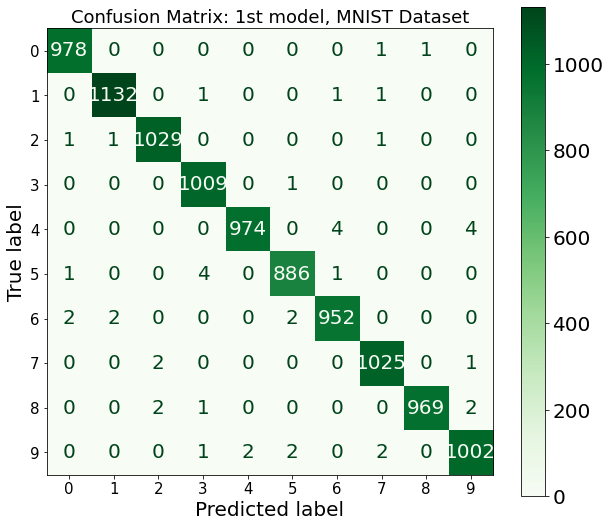

In [11]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20


# Implementing visualization of confusion matrix
display_c_m = ConfusionMatrixDisplay(c_m)


# Plotting confusion matrix
# Setting colour map to be used
display_c_m.plot(cmap='Greens')
# Other possible options for colour map are:
# 'OrRd', 'autumn_r', 'Blues', 'cool', 'Greys', 'PuRd', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Giving name to the plot
plt.title('Confusion Matrix: 1st model, MNIST Dataset', fontsize=18)


# Saving plot
plt.savefig('confusion_matrix_model_1_mnist_dataset.png', transparent=True, dpi=500)


# Showing the plot
plt.show()


### MNIST dataset, 1st model

## Step 5: Testing on one image

In [12]:
# Opening saved Mean Image for GRAY MNIST dataset
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'mnist' + '/' + 
               'mean_gray_dataset_mnist.hdf5', 'r') as f:
    # Extracting saved array for Mean Image
    # Saving it into new variable
    mean_gray = f['mean']  # HDF5 dataset
    # Converting it into Numpy array
    mean_gray = np.array(mean_gray)  # Numpy arrays


# Opening saved Standard Deviation for GRAY MNIST dataset
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'mnist' + '/' + 
               'std_gray_dataset_mnist.hdf5', 'r') as f:
    # Extracting saved array for Standard Deviation
    # Saving it into new variable
    std_gray = f['std']  # HDF5 dataset
    # Converting it into Numpy array
    std_gray = np.array(std_gray)  # Numpy arrays


# Check points
# Showing shapes of loaded Numpy arrays
print('GRAY Mean Image         :', mean_gray.shape)
print('GRAY Standard Deviation :', std_gray.shape)


GRAY Mean Image         : (28, 28, 1)
GRAY Standard Deviation : (28, 28, 1)


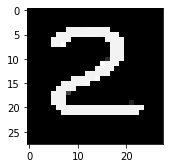

Shape of GRAY image        : (28, 28, 1)
Pixels of GRAY image       : [  0   0 192 192 192]
GRAY /255.0                : [0.         0.         0.75294118 0.75294118 0.75294118]
GRAY /255.0 => mean        : [-0.00151403 -0.00568674  0.73910026  0.7247764   0.70230033]
GRAY /255.0 => mean => std : [-0.05133836 -0.09011218  7.39903729  5.05788685  3.64884561]


In [18]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (2.5, 2.5)



# Reading image by OpenCV library
# In this way image is opened already as Numpy array
# (!) OpenCV by default reads images in BGR order of channels
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
image_mnist_bgr = cv2.imread('images_to_test' + '/' + 'mnist_to_test_1.jpg')

# Converting image to GRAY by OpenCV function
image_mnist_gray = cv2.cvtColor(image_mnist_bgr, cv2.COLOR_BGR2GRAY)

# Resizing image to 28 by 28 pixels size
image_mnist_gray = cv2.resize(image_mnist_gray,
                              (28, 28),
                              interpolation=cv2.INTER_CUBIC)
plt.imshow(image_mnist_gray, cmap=plt.get_cmap('gray'))
plt.show()

# Extending dimension from (height, width) to (height, width, one channel)
image_mnist_gray = image_mnist_gray[:, :, np.newaxis]

# Check point
# Showing converted into GRAY image




# Implementing normalization by dividing image's pixels on 255.0
image_mnist_gray_255 = image_mnist_gray / 255.0

# Implementing normalization by subtracting Mean Image
image_mnist_gray_255_mean = image_mnist_gray_255 - mean_gray

# Implementing preprocessing by dividing on Standard Deviation
image_mnist_gray_255_mean_std = image_mnist_gray_255_mean / std_gray

# Check points
# Showing shape of Numpy array with GRAY image
# Showing some pixels' values
print('Shape of GRAY image        :', image_mnist_gray.shape)
print('Pixels of GRAY image       :', image_mnist_gray[5, 4:9, 0])
print('GRAY /255.0                :', image_mnist_gray_255[5, 4:9, 0])
print('GRAY /255.0 => mean        :', image_mnist_gray_255_mean[5, 4:9, 0])
print('GRAY /255.0 => mean => std :', image_mnist_gray_255_mean_std[5, 4:9, 0])


In [15]:
# Extending dimension from (height, width, channels) to (1, height, width, channels)
image_mnist_gray_255_mean = image_mnist_gray_255_mean[np.newaxis, :, :, :]
image_mnist_gray_255_mean_std = image_mnist_gray_255_mean_std[np.newaxis, :, :, :]

# Check points
# Showing shapes of extended Numpy arrays
print('GRAY /255.0 => mean        :', image_mnist_gray_255_mean.shape)
print('GRAY /255.0 => mean => std :', image_mnist_gray_255_mean_std.shape)


GRAY /255.0 => mean        : (1, 28, 28, 1)
GRAY /255.0 => mean => std : (1, 28, 28, 1)


In [16]:
# Check point
# Showing information about created function
print(help(bar_chart))


Help on function bar_chart in module __main__:

bar_chart(scores, bar_title, show_xticks=True, labels=None)
    # Defining function to plot bar chart with scores values

None



Scores shape        : (1, 10)
Scores values       : [8.5358977e-13 7.5273530e-11 1.0000000e+00 7.8313848e-12 6.8352133e-13]
Scores sum          : 1.0
Score of prediction : 1.00000
Class index         : 2
Time                : 0.05481


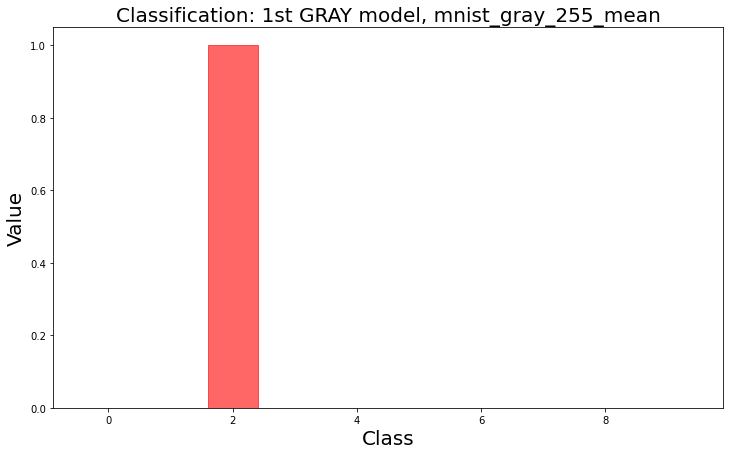

Scores shape        : (1, 10)
Scores values       : [5.7437175e-25 7.0798001e-21 1.0000000e+00 7.3087843e-18 1.4155327e-33]
Scores sum          : 1.0
Score of prediction : 1.00000
Class index         : 2
Time                : 0.04738


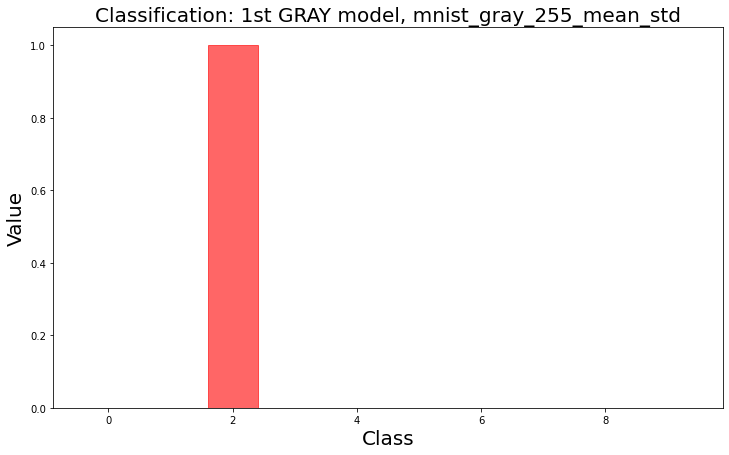

In [17]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12, 7)



# Testing GRAY model trained on dataset: dataset_mnist_gray_255_mean.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_gray[0].predict(image_mnist_gray_255_mean)
end = timer()

# Scores are given as 10 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0, 0:5])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='1st GRAY model, mnist_gray_255_mean',
          show_xticks=False)



# Testing GRAY model trained on dataset: dataset_mnist_gray_255_mean_std.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_gray[1].predict(image_mnist_gray_255_mean_std)
end = timer()

# Scores are given as 10 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index and time
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0, 0:5])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='1st GRAY model, mnist_gray_255_mean_std',
          show_xticks=False)


### MNIST dataset, 2nd model

## Step 1: Loading saved 2nd model

In [1]:
# Defining list to collect models in
model_gray = []


# Loading 2nd model for MNIST dataset
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
for i in range(2):
    model_gray.append(load_model(full_path_to_Section5 + '/' + 
                                 'mnist' + '/' + 
                                 'model_2_mnist_gray.h5'))


# Check point
print('Models are successfully loaded')


NameError: name 'load_model' is not defined

In [20]:
# Showing model's input shape
print(model_gray[0].layers[0].input_shape)


(None, 28, 28, 1)


### MNIST dataset, 2nd model

## Step 2: Loading and assigning best weights

In [21]:
# Preparing list with weights' names
weights = ['w_2_mnist_gray_255_mean.h5',
           'w_2_mnist_gray_255_mean_std.h5']


# Loading best weights for 2nd model
for i in range(2):    
    # loading and assigning best weights
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    model_gray[i].load_weights('mnist' + '/' + weights[i])
    
    
    # Check point
    print('Best weights for 2nd GRAY model are loaded and assigned : ', weights[i])


Best weights for 2nd GRAY model are loaded and assigned :  w_2_mnist_gray_255_mean.h5
Best weights for 2nd GRAY model are loaded and assigned :  w_2_mnist_gray_255_mean_std.h5


### MNIST dataset, 2nd model

## Step 3: Predicting with test dataset

In [22]:
# Preparing list with datasets' names
datasets = ['dataset_mnist_gray_255_mean.hdf5',
            'dataset_mnist_gray_255_mean_std.hdf5']


# Defining variable to identify the best model
accuracy_best = 0


# Testing 2nd model with all MNIST datasets in a loop
for i in range(2):    
    # Opening saved MNIST dataset from HDF5 binary file
    # Initiating File object
    # Opening file in reading mode by 'r'
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    with h5py.File(full_path_to_Section4 + '/' + 'mnist' + '/' + datasets[i], 'r') as f:
        # Extracting saved arrays for testing by appropriate keys
        # Saving them into new variables
        x_test = f['x_test']  # HDF5 dataset
        y_test = f['y_test']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_test = np.array(x_test)  # Numpy arrays
        y_test = np.array(y_test)  # Numpy arrays
    
    
    # Check point
    print('Dataset is opened :', datasets[i])
    
    
    # Check point
    # Showing shapes of loaded arrays
    if i == 0:
        print('x_test shape      :', x_test.shape)
        print('y_test shape      :', y_test.shape)
    
    
    # Testing RGB model with current dataset
    temp = model_gray[i].predict(x_test)
    
    
    # Check point
    # Showing prediction shape and scores
    if i == 0:
        print('prediction shape  :', temp.shape)  # (10000, 10)
        print('prediction scores :', temp[0, 0:5])  # 5 score numbers
    
    
    # Getting indexes of maximum values along specified axis
    temp = np.argmax(temp, axis=1)
    
    
    # Check point
    # Showing prediction shape after convertion
    # Showing predicted and correct indexes of classes
    if i == 0:
        print('prediction shape  :', temp.shape)  # (10000,)
        print('predicted indexes :', temp[0:10])
        print('correct indexes   :', y_test[:10])
    
    
    # Calculating accuracy
    # We compare predicted class with correct class for all input images
    # By saying 'temp == y_test' we create Numpy array with True and False values
    # By function 'np.mean' we calculate mean value:
    # all_True / (all_True + all_False)
    accuracy = np.mean(temp == y_test)
    
    
    # Check point
    # Showing True and False matrix
    if i == 0:
         print('T and F matrix    :', (temp == y_test)[0:10])
    
    
    # Check point
    # Showing calculated accuracy
    print('Testing accuracy  : {0:.5f}'.format(accuracy))
    print()
    
    
    # Identifying the best model
    # Saving predicted indexes of the best model
    if accuracy > accuracy_best:
        # Updating value of the best accuracy
        accuracy_best = accuracy
        
        # Saving predicted indexes of the best model into array
        # Updating array with predicted indexes of the best model
        y_predicted_best = temp
    

Dataset is opened : dataset_mnist_gray_255_mean.hdf5
x_test shape      : (10000, 28, 28, 1)
y_test shape      : (10000,)
prediction shape  : (10000, 10)
prediction scores : [4.2424419e-26 4.4087846e-18 2.4615611e-21 4.9097832e-20 3.5353069e-19]
prediction shape  : (10000,)
predicted indexes : [7 2 1 0 4 1 4 9 5 9]
correct indexes   : [7 2 1 0 4 1 4 9 5 9]
T and F matrix    : [ True  True  True  True  True  True  True  True  True  True]
Testing accuracy  : 0.99210

Dataset is opened : dataset_mnist_gray_255_mean_std.hdf5
Testing accuracy  : 0.99000



### MNIST dataset, 2nd model

## Step 4: Classification report & Confusion matrix

- **TP (True Positive)** is a number of **right predictions** that are **correct**  
when label is **True** *and* predicted as **True**  
  
  
- **TN (True Negative)** is a number of **right predictions** that are **incorrect**  
when label is **False** *and* predicted as **False**  
  
  
- **FP (False Positive)** is a number of **not right predictions** that are **incorrect**  
when label is **False** *but* predicted as **True**  
  
  
- **FN (False Negative)** is a number of **not right predictions** that are **correct**  
when label is **True** *but* predicted as **False**  
  
  
- **Precision**  is an accuracy of positive predictions  
Precision represents **percent of correct predictions**  
In other words, it is **ability not to label** an image **as positive** that is actually **negative**   
Precision is calculated by following equation:  
Precision = TP / (TP + FP)  
  
  
- **Recall**  is a fraction of positive predictions among all True samples  
In other words, it is **ability to find all positive samples**  
Recall is calculated by following equation:  
Recall = TP / (TP + FN)  
  
  
- **F1-score**  is a so called **weighted harmonic mean of the Precision and Recall**  
F1-score also known as balanced F-score or F-measure,  
as it incorporates Precision and Recall into computation,  
and, therefore, contributions of Precision and Recall to F1-score are equal  
F1-score reaches its best value at 1 and worst score at 0  
F1-score is calculated by following equation:  
F1-score = 2 * (Recall * Precision) / (Recall + Precision)  
  
  
- **Support** is a number of occurrences of each class in a dataset  
  
  
- **Accuracy** is a global accuracy of entire classifier  
Accuracy is calculated by following equation:  
Accuracy = (TP + TN) / (TP + TN + FP + FN)  
(all correct / all)  

  
- **macro avg** calculates the mean of the metrics,   
giving equal weight to each class  
  
  
- **weighted avg** calculates the weighted mean of the metrics  
It takes into account imbalance of samples' number for every class  
It weights every metric by occurrences of each class in a dataset  


In [23]:
# Showing the main classification metrics of the best model
print(classification_report(y_test, y_predicted_best))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [24]:
# Confusion matrix is a two dimensional matrix that visualizes the performance,
# and makes it easy to see confusion between classes,
# by providing a picture of interrelation

# Each row represents a number of actual class
# Each column represents a number of predicted class


# Computing confusion matrix to evaluate accuracy of classification
c_m = confusion_matrix(y_test, y_predicted_best)

# Showing confusion matrix in form of Numpy array
print(c_m)


[[ 975    0    0    0    0    0    2    1    2    0]
 [   0 1133    0    0    0    0    1    0    0    1]
 [   2    1 1024    0    1    0    1    2    1    0]
 [   0    0    0 1001    0    2    0    4    2    1]
 [   0    0    1    0  971    0    3    0    0    7]
 [   1    0    0    5    0  883    1    1    0    1]
 [   3    2    0    0    2    1  948    0    2    0]
 [   1    0    4    0    0    0    0 1021    1    1]
 [   0    0    2    1    0    0    0    2  969    0]
 [   0    1    0    0    6    1    0    4    1  996]]


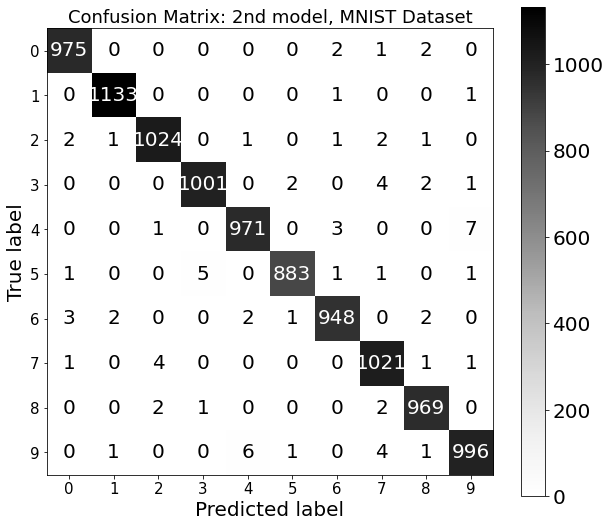

In [25]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (10.0, 9.0)
plt.rcParams['font.size'] = 20


# Implementing visualization of confusion matrix
display_c_m = ConfusionMatrixDisplay(c_m)


# Plotting confusion matrix
# Setting colour map to be used
display_c_m.plot(cmap='Greys')
# Other possible options for colour map are:
# 'OrRd', 'autumn_r', 'Blues', 'cool', 'Greens', 'PuRd', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


# Giving name to the plot
plt.title('Confusion Matrix: 2nd model, MNIST Dataset', fontsize=18)


# Saving plot
plt.savefig('confusion_matrix_model_2_mnist_dataset.png', transparent=True, dpi=500)


# Showing the plot
plt.show()


### MNIST dataset, 2nd model

## Step 5: Testing on one image

In [26]:
# Check points
# Showing shapes of loaded Numpy arrays of
# Mean Image and Standard Deviation
print('GRAY Mean Image         :', mean_gray.shape)
print('GRAY Standard Deviation :', std_gray.shape)


GRAY Mean Image         : (28, 28, 1)
GRAY Standard Deviation : (28, 28, 1)


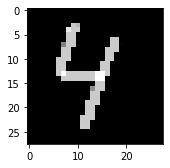

Shape of GRAY image        : (28, 28, 1)
Pixels of GRAY image       : [  0   0   0   0 191]
GRAY /255.0                : [0.         0.         0.         0.         0.74901961]
GRAY /255.0 => mean        : [-0.00151403 -0.00568674 -0.01384091 -0.02816477  0.69837876]
GRAY /255.0 => mean => std : [-0.05133836 -0.09011218 -0.13855961 -0.19654923  3.62847085]


In [28]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (2.5, 2.5)



# Reading image by OpenCV library
# In this way image is opened already as Numpy array
# (!) OpenCV by default reads images in BGR order of channels
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
image_mnist_bgr = cv2.imread('images_to_test' + '/' + 'mnist_to_test_2.jpg')

# Converting image to GRAY by OpenCV function
image_mnist_gray = cv2.cvtColor(image_mnist_bgr, cv2.COLOR_BGR2GRAY)

# Resizing image to 28 by 28 pixels size
image_mnist_gray = cv2.resize(image_mnist_gray,
                              (28, 28),
                              interpolation=cv2.INTER_CUBIC)
# Check point
# Showing converted into GRAY image
plt.imshow(image_mnist_gray, cmap=plt.get_cmap('gray'))
plt.show()

# Extending dimension from (height, width) to (height, width, one channel)
image_mnist_gray = image_mnist_gray[:, :, np.newaxis]





# Implementing normalization by dividing image's pixels on 255.0
image_mnist_gray_255 = image_mnist_gray / 255.0

# Implementing normalization by subtracting Mean Image
image_mnist_gray_255_mean = image_mnist_gray_255 - mean_gray

# Implementing preprocessing by dividing on Standard Deviation
image_mnist_gray_255_mean_std = image_mnist_gray_255_mean / std_gray

# Check points
# Showing shape of Numpy array with GRAY image
# Showing some pixels' values
print('Shape of GRAY image        :', image_mnist_gray.shape)
print('Pixels of GRAY image       :', image_mnist_gray[5, 4:9, 0])
print('GRAY /255.0                :', image_mnist_gray_255[5, 4:9, 0])
print('GRAY /255.0 => mean        :', image_mnist_gray_255_mean[5, 4:9, 0])
print('GRAY /255.0 => mean => std :', image_mnist_gray_255_mean_std[5, 4:9, 0])


In [29]:
# Extending dimension from (height, width, channels) to (1, height, width, channels)
image_mnist_gray_255_mean = image_mnist_gray_255_mean[np.newaxis, :, :, :]
image_mnist_gray_255_mean_std = image_mnist_gray_255_mean_std[np.newaxis, :, :, :]

# Check points
# Showing shapes of extended Numpy arrays
print('GRAY /255.0 => mean        :', image_mnist_gray_255_mean.shape)
print('GRAY /255.0 => mean => std :', image_mnist_gray_255_mean_std.shape)


GRAY /255.0 => mean        : (1, 28, 28, 1)
GRAY /255.0 => mean => std : (1, 28, 28, 1)


In [30]:
# Check point
# Showing information about created function
print(help(bar_chart))


Help on function bar_chart in module __main__:

bar_chart(scores, bar_title, show_xticks=True, labels=None)
    # Defining function to plot bar chart with scores values

None



Scores shape        : (1, 10)
Scores values       : [3.3340747e-26 1.9363910e-11 1.0377395e-22 1.9558656e-24 1.0000000e+00]
Scores sum          : 1.0
Score of prediction : 1.00000
Class index         : 4
Time                : 0.04577


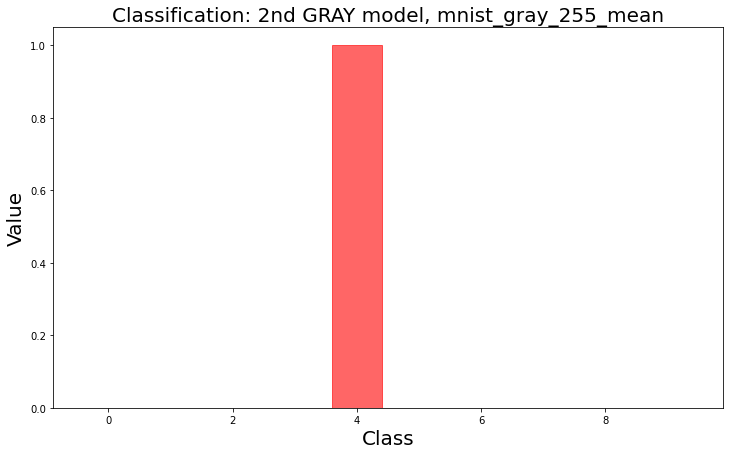


Scores shape        : (1, 10)
Scores values       : [8.7554062e-35 1.4525823e-18 2.6678559e-27 3.2532547e-32 1.0000000e+00]
Scores sum          : 1.0
Score of prediction : 1.00000
Class index         : 4
Time                : 0.05022


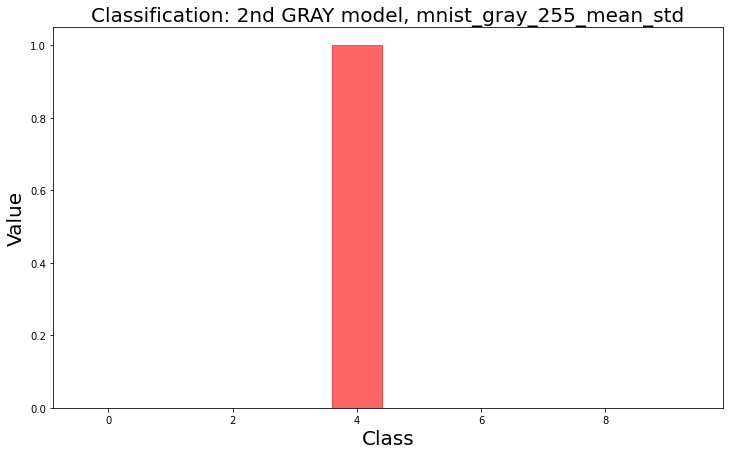

In [31]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12, 7)



# Testing GRAY model trained on dataset: dataset_mnist_gray_255_mean.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_gray[0].predict(image_mnist_gray_255_mean)
end = timer()

# Scores are given as 10 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0, 0:5])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='2nd GRAY model, mnist_gray_255_mean',
          show_xticks=False)



# Testing GRAY model trained on dataset: dataset_mnist_gray_255_mean_std.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_gray[1].predict(image_mnist_gray_255_mean_std)
end = timer()

# Scores are given as 10 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0, 0:5])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='2nd GRAY model, mnist_gray_255_mean_std',
          show_xticks=False)


### Traffic Signs dataset, 1st model

## Step 1: Loading saved 1st model

In [5]:
# Defining lists to collect models in
model_rgb = []
model_gray = []


# Loading 1st model for Traffic Signs dataset
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
for i in range(2):
    model_rgb.append(load_model(full_path_to_Section5 + '/' + 'ts' + '/' + 'model_1_ts_rgb.h5'))
    model_gray.append(load_model(full_path_to_Section5 + '/' + 'ts' + '/' + 'model_1_ts_gray.h5'))


# Check point
print('Models are successfully loaded')


Models are successfully loaded


In [6]:
# Showing models' input shapes
print(model_rgb[0].layers[0].input_shape)
print()
print(model_gray[0].layers[0].input_shape)


(None, 48, 48, 3)

(None, 48, 48, 1)


### Traffic Signs dataset, 1st model

## Step 2: Loading and assigning best weights

In [7]:
# Preparing list with weights' names
weights = ['w_1_ts_rgb_255_mean.h5',
           'w_1_ts_rgb_255_mean_std.h5',
           'w_1_ts_gray_255_mean.h5',
           'w_1_ts_gray_255_mean_std.h5']


# Loading best weights for 1st model
for i in range(4):    
    # Checking if it is RGB model
    if i <= 1:
        # loading and assigning best weights
        # (!) On Windows, it might need to change
        # this: + '/' +
        # to this: + '\' +
        # or to this: + '\\' +
        model_rgb[i].load_weights('ts' + '/' + weights[i])
        
        
        # Check point
        print('Best weights for 1st RGB model are loaded and assigned  : ', weights[i])
    
    # Checking if it is GRAY model
    elif i >= 2:
        # loading and assigning best weights
        # (!) On Windows, it might need to change
        # this: + '/' +
        # to this: + '\' +
        # or to this: + '\\' +
        model_gray[i-2].load_weights('ts' + '/' + weights[i])
        
        
        # Check point
        print('Best weights for 1st GRAY model are loaded and assigned : ', weights[i])


Best weights for 1st RGB model are loaded and assigned  :  w_1_ts_rgb_255_mean.h5
Best weights for 1st RGB model are loaded and assigned  :  w_1_ts_rgb_255_mean_std.h5
Best weights for 1st GRAY model are loaded and assigned :  w_1_ts_gray_255_mean.h5
Best weights for 1st GRAY model are loaded and assigned :  w_1_ts_gray_255_mean_std.h5


### Traffic Signs dataset, 1st model

## Step 3: Predicting with test dataset

In [8]:
# Preparing list with datasets' names
datasets = ['dataset_ts_rgb_255_mean.hdf5',
            'dataset_ts_rgb_255_mean_std.hdf5',
            'dataset_ts_gray_255_mean.hdf5',
            'dataset_ts_gray_255_mean_std.hdf5']


# Defining variable to identify the best model
accuracy_best = 0


# Testing 1st model with all Traffic Signs datasets in a loop
for i in range(4):    
    # Opening saved Traffic Signs dataset from HDF5 binary file
    # Initiating File object
    # Opening file in reading mode by 'r'
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    with h5py.File(full_path_to_Section4 + '/' + 'ts' + '/' + datasets[i], 'r') as f:
        # Extracting saved arrays for testing by appropriate keys
        # Saving them into new variables
        x_test = f['x_test']  # HDF5 dataset
        y_test = f['y_test']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_test = np.array(x_test)  # Numpy arrays
        y_test = np.array(y_test)  # Numpy arrays
    
    
    # Check point
    print('Dataset is opened :', datasets[i])
    
    
    # Check point
    # Showing shapes of loaded arrays
    if i == 0:
        print('x_test shape      :', x_test.shape)
        print('y_test shape      :', y_test.shape)
    
    
    # Checking if RGB dataset is opened
    if i <= 1:
        # Testing RGB model with current dataset
        temp = model_rgb[i].predict(x_test)
        
        
        # Check point
        # Showing prediction shape and scores
        if i == 0:
            print('prediction shape  :', temp.shape)  # (3111, 43)
            print('prediction scores :', temp[0, 0:5])  # 5 score numbers
      
    
        # Getting indexes of maximum values along specified axis
        temp = np.argmax(temp, axis=1)
        
        
        # Check point
        # Showing prediction shape after convertion
        # Showing predicted and correct indexes of classes
        if i == 0:
            print('prediction shape  :', temp.shape)  # (3111,)
            print('predicted indexes :', temp[0:10])
            print('correct indexes   :', y_test[:10])
        
        
        # Calculating accuracy
        # We compare predicted class with correct class for all input images
        # By saying 'temp == y_test' we create Numpy array with True and False values
        # By function 'np.mean' we calculate mean value:
        # all_True / (all_True + all_False)
        accuracy = np.mean(temp == y_test)
        
        
        # Check point
        # Showing True and False matrix
        if i == 0:
            print('T and F matrix    :', (temp == y_test)[0:10])
        
        
        # Check point
        # Showing calculated accuracy
        print('Testing accuracy  : {0:.5f}'.format(accuracy))
        print()
    
    # Checking if GRAY dataset is opened
    elif i >= 2:
        # Testing GRAY model with current dataset
        temp = model_gray[i-2].predict(x_test)
        
        
        # Getting indexes of maximum values along specified axis
        temp = np.argmax(temp, axis=1)
        
        
        # Calculating accuracy
        # We compare predicted class with correct class for all input images
        # By saying 'temp == y_test' we create Numpy array with True and False values
        # By function 'np.mean' we calculate mean value:
        # all_True / (all_True + all_False)
        accuracy = np.mean(temp == y_test)
        
        
        # Check point
        # Showing calculated accuracy
        print('Testing accuracy  : {0:.5f}'.format(accuracy))
        print()
    
    
    # Identifying the best model
    # Saving predicted indexes of the best model
    if accuracy > accuracy_best:
        # Updating value of the best accuracy
        accuracy_best = accuracy
        
        # Saving predicted indexes of the best model into array
        # Updating array with predicted indexes of the best model
        y_predicted_best = temp
    

Dataset is opened : dataset_ts_rgb_255_mean.hdf5
x_test shape      : (3111, 48, 48, 3)
y_test shape      : (3111,)
prediction shape  : (3111, 43)
prediction scores : [0. 0. 0. 0. 0.]
prediction shape  : (3111,)
predicted indexes : [25 12 10  1  7 18 12 15 14 19]
correct indexes   : [25 12 10  1  7 18 12 15 14 19]
T and F matrix    : [ True  True  True  True  True  True  True  True  True  True]
Testing accuracy  : 0.99936

Dataset is opened : dataset_ts_rgb_255_mean_std.hdf5
Testing accuracy  : 0.99646

Dataset is opened : dataset_ts_gray_255_mean.hdf5
Testing accuracy  : 0.99904

Dataset is opened : dataset_ts_gray_255_mean_std.hdf5
Testing accuracy  : 0.99807



### Traffic Signs dataset, 1st model

## Step 4: Classification report & Confusion matrix

- **TP (True Positive)** is a number of **right predictions** that are **correct**  
when label is **True** *and* predicted as **True**  
  
  
- **TN (True Negative)** is a number of **right predictions** that are **incorrect**  
when label is **False** *and* predicted as **False**  
  
  
- **FP (False Positive)** is a number of **not right predictions** that are **incorrect**  
when label is **False** *but* predicted as **True**  
  
  
- **FN (False Negative)** is a number of **not right predictions** that are **correct**  
when label is **True** *but* predicted as **False**  
  
  
- **Precision**  is an accuracy of positive predictions  
Precision represents **percent of correct predictions**  
In other words, it is **ability not to label** an image **as positive** that is actually **negative**   
Precision is calculated by following equation:  
Precision = TP / (TP + FP)  
  
  
- **Recall**  is a fraction of positive predictions among all True samples  
In other words, it is **ability to find all positive samples**  
Recall is calculated by following equation:  
Recall = TP / (TP + FN)  
  
  
- **F1-score**  is a so called **weighted harmonic mean of the Precision and Recall**  
F1-score also known as balanced F-score or F-measure,  
as it incorporates Precision and Recall into computation,  
and, therefore, contributions of Precision and Recall to F1-score are equal  
F1-score reaches its best value at 1 and worst score at 0  
F1-score is calculated by following equation:  
F1-score = 2 * (Recall * Precision) / (Recall + Precision)  
  
  
- **Support** is a number of occurrences of each class in a dataset  
  
  
- **Accuracy** is a global accuracy of entire classifier  
Accuracy is calculated by following equation:  
Accuracy = (TP + TN) / (TP + TN + FP + FN)  
(all correct / all)  

  
- **macro avg** calculates the mean of the metrics,   
giving equal weight to each class  
  
  
- **weighted avg** calculates the weighted mean of the metrics  
It takes into account imbalance of samples' number for every class  
It weights every metric by occurrences of each class in a dataset  


In [9]:
# Showing the main classification metrics of the best model
print(classification_report(y_test, y_predicted_best))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00       184
           2       1.00      1.00      1.00       178
           3       1.00      1.00      1.00       128
           4       1.00      1.00      1.00       139
           5       1.00      1.00      1.00       157
           6       1.00      1.00      1.00        40
           7       1.00      1.00      1.00        99
           8       1.00      0.99      1.00       131
           9       1.00      1.00      1.00       111
          10       1.00      1.00      1.00       140
          11       0.99      1.00      0.99        89
          12       1.00      1.00      1.00       158
          13       1.00      1.00      1.00       167
          14       0.99      1.00      0.99        76
          15       1.00      1.00      1.00        54
          16       1.00      1.00      1.00        40
          17       1.00    

In [10]:
# Confusion matrix is a two dimensional matrix that visualizes the performance,
# and makes it easy to see confusion between classes,
# by providing a picture of interrelation

# Each row represents a number of actual class  
# Each column represents a number of predicted class  


# Computing confusion matrix to evaluate accuracy of classification
c_m = confusion_matrix(y_test, y_predicted_best)

# Showing confusion matrix in form of Numpy array
print(c_m)



[[ 15   0   0 ...   0   0   0]
 [  0 184   0 ...   0   0   0]
 [  0   0 178 ...   0   0   0]
 ...
 [  0   0   0 ...  41   0   0]
 [  0   0   0 ...   0  14   0]
 [  0   0   0 ...   0   0  18]]


In [11]:
# Preparing labels for Traffic Signs dataset
# Getting Pandas dataFrame with labels
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
labels_ts = pd.read_csv(full_path_to_Section3 + '/' + 'classes_names.csv', sep=',')


# Check point
# Showing first 5 elements of the dataFrame
print(labels_ts.head())
print()


# Showing class's name of the 1st element
print(labels_ts.loc[0, 'SignName'])
print()


# Converting into Numpy array
labels_ts = np.array(labels_ts.loc[:, 'SignName']).flatten()


# Check points
# Showing size of Numpy array
# Showing all elements of Numpy array
print('Total number of labels:', labels_ts.size)
print()
print(labels_ts)


   ClassId              SignName
0        0  Speed limit (20km/h)
1        1  Speed limit (30km/h)
2        2  Speed limit (50km/h)
3        3  Speed limit (60km/h)
4        4  Speed limit (70km/h)

Speed limit (20km/h)

Total number of labels: 43

['Speed limit (20km/h)' 'Speed limit (30km/h)' 'Speed limit (50km/h)'
 'Speed limit (60km/h)' 'Speed limit (70km/h)' 'Speed limit (80km/h)'
 'End of speed limit (80km/h)' 'Speed limit (100km/h)'
 'Speed limit (120km/h)' 'No passing'
 'No passing for vehicles over 3.5 metric tons'
 'Right-of-way at the next intersection' 'Priority road' 'Yield' 'Stop'
 'No vehicles' 'Vehicles over 3.5 metric tons prohibited' 'No entry'
 'General caution' 'Dangerous curve to the left'
 'Dangerous curve to the right' 'Double curve' 'Bumpy road'
 'Slippery road' 'Road narrows on the right' 'Road work' 'Traffic signals'
 'Pedestrians' 'Children crossing' 'Bicycles crossing'
 'Beware of ice/snow' 'Wild animals crossing'
 'End of all speed and passing limits' 'Turn

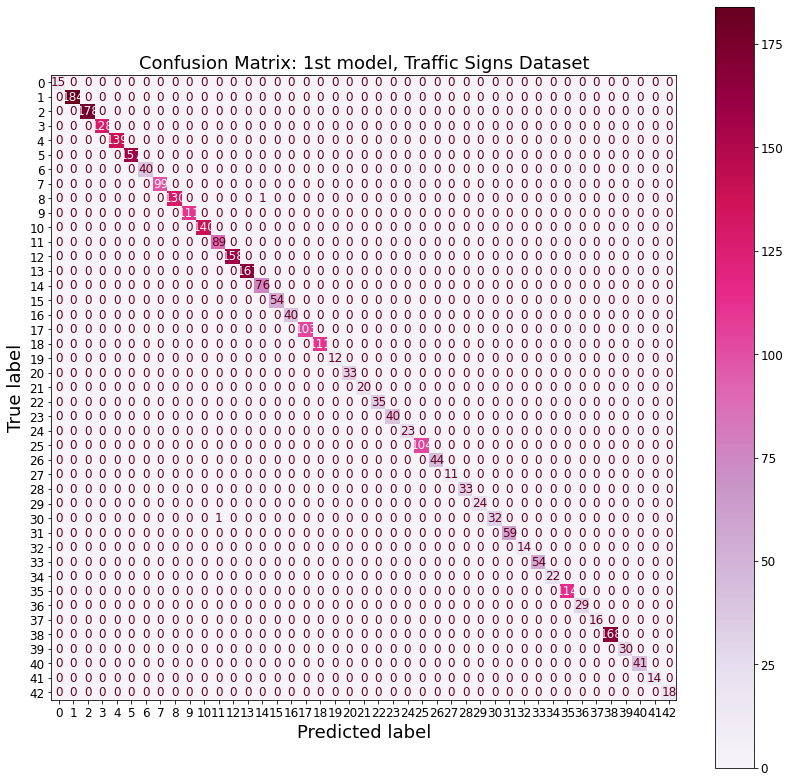

In [12]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (14.0, 14.0)
plt.rcParams['font.size'] = 12


# Implementing visualization of confusion matrix
display_c_m = ConfusionMatrixDisplay(c_m)


# Plotting confusion matrix
# Setting colour map to be used
display_c_m.plot(cmap='PuRd')
# Other possible options for colour map are:
# 'OrRd', 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'copper_r'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# Setting fontsize for xlabels and ylabels
plt.xlabel('Predicted label', fontsize=18)
plt.ylabel('True label', fontsize=18)


# Giving name to the plot
plt.title('Confusion Matrix: 1st model, Traffic Signs Dataset', fontsize=18)


# Saving plot
plt.savefig('confusion_matrix_model_1_ts_dataset.png', transparent=True, dpi=500)


# Showing the plot
plt.show()


### Traffic Signs dataset, 1st model

## Step 5: Testing on one image

In [13]:
# Opening saved Mean Image for RGB Traffic Signs dataset
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'ts' + '/' + 'mean_rgb_dataset_ts.hdf5', 'r') as f:
    # Extracting saved array for Mean Image
    # Saving it into new variable
    mean_rgb = f['mean']  # HDF5 dataset
    # Converting it into Numpy array
    mean_rgb = np.array(mean_rgb)  # Numpy arrays


# Opening saved Standard Deviation for RGB Traffic Signs dataset
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'ts' + '/' + 'std_rgb_dataset_ts.hdf5', 'r') as f:
    # Extracting saved array for Standard Deviation
    # Saving it into new variable
    std_rgb = f['std']  # HDF5 dataset
    # Converting it into Numpy array
    std_rgb = np.array(std_rgb)  # Numpy arrays


# Opening saved Mean Image for GRAY Traffic Signs dataset
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'ts' + '/' + 'mean_gray_dataset_ts.hdf5', 'r') as f:
    # Extracting saved array for Mean Image
    # Saving it into new variable
    mean_gray = f['mean']  # HDF5 dataset
    # Converting it into Numpy array
    mean_gray = np.array(mean_gray)  # Numpy arrays


# Opening saved Standard Deviation for GRAY Traffic Signs dataset
# Initiating File object
# Opening file in reading mode by 'r'
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
with h5py.File(full_path_to_Section4 + '/' + 'ts' + '/' + 'std_gray_dataset_ts.hdf5', 'r') as f:
    # Extracting saved array for Standard Deviation
    # Saving it into new variable
    std_gray = f['std']  # HDF5 dataset
    # Converting it into Numpy array
    std_gray = np.array(std_gray)  # Numpy arrays


# Check points
# Showing shapes of loaded Numpy arrays
print('RGB Mean Image          :', mean_rgb.shape)
print('RGB Standard Deviation  :', std_rgb.shape)
print('GRAY Mean Image         :', mean_gray.shape)
print('GRAY Standard Deviation :', std_gray.shape)


RGB Mean Image          : (48, 48, 3)
RGB Standard Deviation  : (48, 48, 3)
GRAY Mean Image         : (48, 48, 1)
GRAY Standard Deviation : (48, 48, 1)


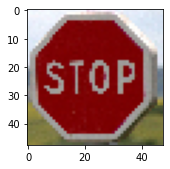

Shape of RGB image         : (48, 48, 3)
Pixels of RGB image        : [245 248 245 242 232]
RGB /255.0                 : [0.96078431 0.97254902 0.96078431 0.94901961 0.90980392]
RGB /255.0 => mean         : [0.61744749 0.62996986 0.61925354 0.6098828  0.57291144]
RGB /255.0 => mean => std  : [2.07800557 2.12682234 2.09087386 2.06676217 1.95017504]



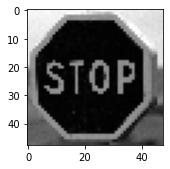

Shape of GRAY image        : (48, 48, 1)
Pixels of GRAY image       : [248 251 248 245 239]
GRAY /255.0                : [0.97254902 0.98431373 0.97254902 0.96078431 0.9372549 ]
GRAY /255.0 => mean        : [0.63449266 0.64701122 0.63642672 0.62702545 0.60580355]
GRAY /255.0 => mean => std : [2.13776723 2.18790991 2.1552785  2.1320636  2.06982275]


In [15]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (2.5, 2.5)



# Reading image by OpenCV library
# In this way image is opened already as Numpy array
# (!) OpenCV by default reads images in BGR order of channels
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
image_ts_bgr = cv2.imread('images_to_test' + '/' + 'ts_to_test_1.jpg')

# Swapping channels from BGR to RGB by OpenCV function
image_ts_rgb = cv2.cvtColor(image_ts_bgr, cv2.COLOR_BGR2RGB)

# Resizing image to 32 by 32 pixels size
image_ts_rgb = cv2.resize(image_ts_rgb,
                              (48, 48),
                              interpolation=cv2.INTER_CUBIC)

# Check point
# Showing loaded and resized image
plt.imshow(image_ts_rgb)
plt.show()



# Implementing normalization by dividing image's pixels on 255.0
image_ts_rgb_255 = image_ts_rgb / 255.0

# Implementing normalization by subtracting Mean Image
image_ts_rgb_255_mean = image_ts_rgb_255 - mean_rgb

# Implementing preprocessing by dividing on Standard Deviation
image_ts_rgb_255_mean_std = image_ts_rgb_255_mean / std_rgb

# Check points
# Showing shape of Numpy array with RGB image
# Showing some pixels' values
print('Shape of RGB image         :', image_ts_rgb.shape)
print('Pixels of RGB image        :', image_ts_rgb[:5, 0, 0])
print('RGB /255.0                 :', image_ts_rgb_255[:5, 0, 0])
print('RGB /255.0 => mean         :', image_ts_rgb_255_mean[:5, 0, 0])
print('RGB /255.0 => mean => std  :', image_ts_rgb_255_mean_std[:5, 0, 0])
print()



# Converting image to GRAY by OpenCV function
image_ts_gray = cv2.cvtColor(image_ts_rgb, cv2.COLOR_RGB2GRAY)
#changed----------------------------------------------
plt.imshow(image_ts_gray, cmap=plt.get_cmap('gray'))
plt.show()

# Extending dimension from (height, width) to (height, width, one channel)
image_ts_gray = image_ts_gray[:, :, np.newaxis]

# Check point
# Showing converted into GRAY image




# Implementing normalization by dividing image's pixels on 255.0
image_ts_gray_255 = image_ts_gray / 255.0

# Implementing normalization by subtracting Mean Image
image_ts_gray_255_mean = image_ts_gray_255 - mean_gray

# Implementing preprocessing by dividing on Standard Deviation
image_ts_gray_255_mean_std = image_ts_gray_255_mean / std_gray

# Check points
# Showing shape of Numpy array with GRAY image
# Showing some pixels' values
print('Shape of GRAY image        :', image_ts_gray.shape)
print('Pixels of GRAY image       :', image_ts_gray[:5, 0, 0])
print('GRAY /255.0                :', image_ts_gray_255[:5, 0, 0])
print('GRAY /255.0 => mean        :', image_ts_gray_255_mean[:5, 0, 0])
print('GRAY /255.0 => mean => std :', image_ts_gray_255_mean_std[:5, 0, 0])


In [16]:
# Extending dimension from (height, width, channels) to (1, height, width, channels)
image_ts_rgb_255_mean = image_ts_rgb_255_mean[np.newaxis, :, :, :]
image_ts_rgb_255_mean_std = image_ts_rgb_255_mean_std[np.newaxis, :, :, :]

image_ts_gray_255_mean = image_ts_gray_255_mean[np.newaxis, :, :, :]
image_ts_gray_255_mean_std = image_ts_gray_255_mean_std[np.newaxis, :, :, :]

# Check points
# Showing shapes of extended Numpy arrays
print('RGB /255.0 => mean         :', image_ts_rgb_255_mean.shape)
print('RGB /255.0 => mean => std  :', image_ts_rgb_255_mean_std.shape)
print()
print('GRAY /255.0 => mean        :', image_ts_gray_255_mean.shape)
print('GRAY /255.0 => mean => std :', image_ts_gray_255_mean_std.shape)


RGB /255.0 => mean         : (1, 48, 48, 3)
RGB /255.0 => mean => std  : (1, 48, 48, 3)

GRAY /255.0 => mean        : (1, 48, 48, 1)
GRAY /255.0 => mean => std : (1, 48, 48, 1)


In [17]:
# Check point
# Showing information about created function
print(help(bar_chart))


Help on function bar_chart in module __main__:

bar_chart(scores, bar_title, show_xticks=True, labels=None)
    # Defining function to plot bar chart with scores values

None



Scores shape        : (1, 43)
Scores values       : [0.000000e+00 0.000000e+00 2.747221e-37 0.000000e+00 1.000000e+00]
Scores sum          : 1.0
Score of prediction : 1.00000
Class index         : 14
Label               : Stop
Time                : 0.06641


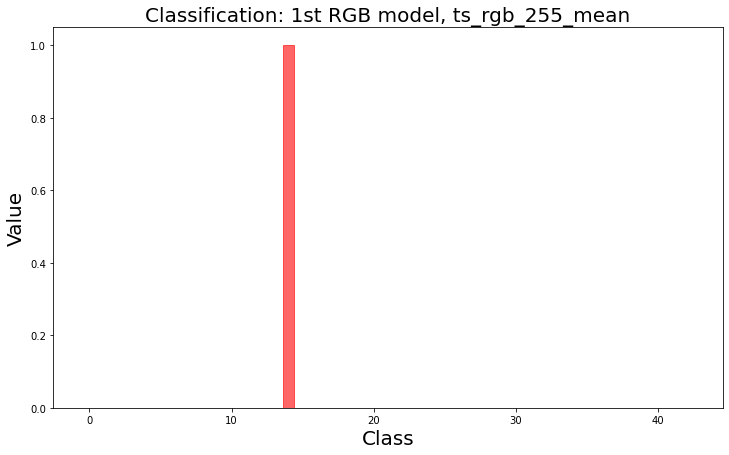


Scores shape        : (1, 43)
Scores values       : [4.0517052e-18 5.3279944e-20 8.5228565e-19 4.6096914e-21 1.0000000e+00]
Scores sum          : 1.0
Score of prediction : 1.00000
Class index         : 14
Label               : Stop
Time                : 0.06229


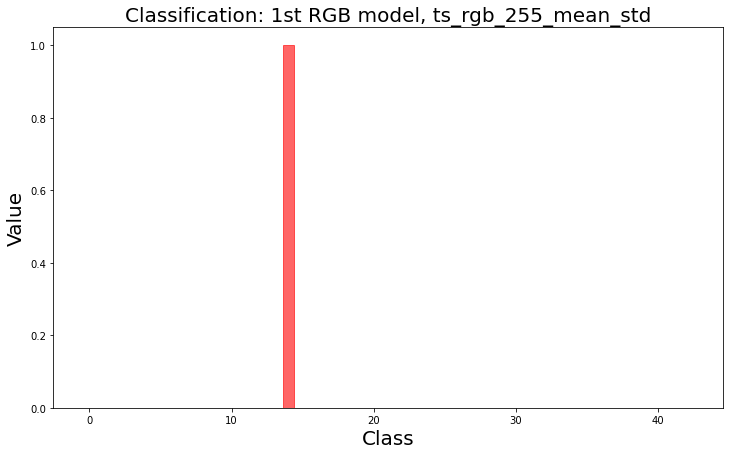


Scores shape        : (1, 43)
Scores values       : [1.5456232e-14 2.0886737e-17 8.1590945e-10 8.6253582e-12 1.0000000e+00]
Scores sum          : 1.0
Score of prediction : 1.00000
Class index         : 14
Label               : Stop
Time                : 0.06125


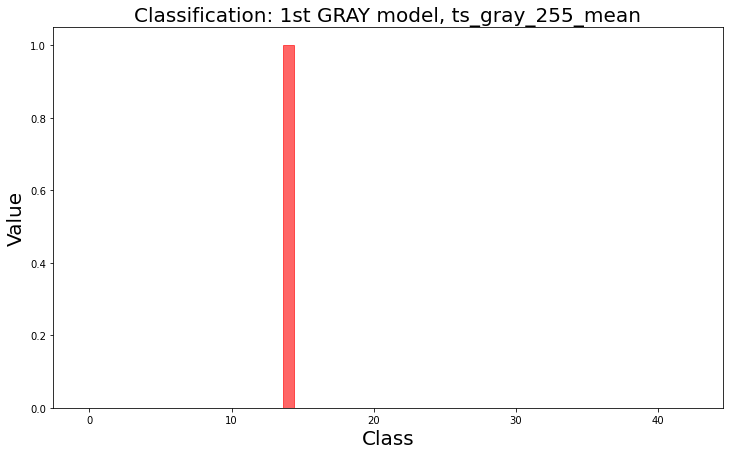


Scores shape        : (1, 43)
Scores values       : [2.5088053e-07 3.4117670e-07 2.7263400e-04 8.3921975e-07 9.9893051e-01]
Scores sum          : 1.0
Score of prediction : 0.99893
Class index         : 14
Label               : Stop
Time                : 0.05162


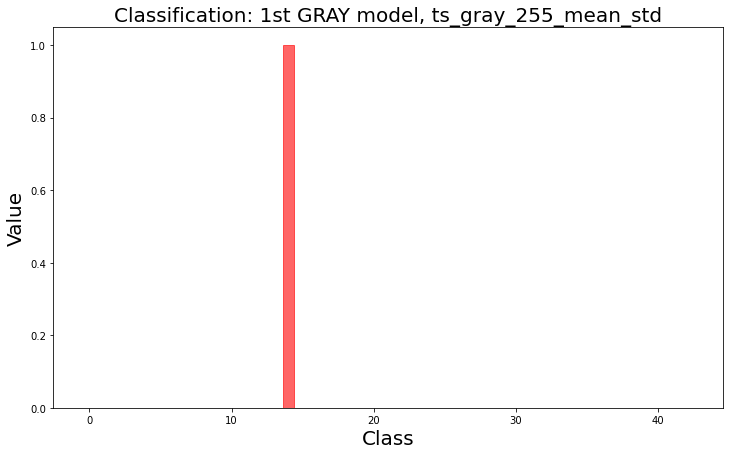

In [18]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12, 7)



# Testing RGB model trained on dataset: dataset_ts_rgb_255_mean.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_rgb[0].predict(image_ts_rgb_255_mean)
end = timer()

# Scores are given as 43 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0, 10:15])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_ts[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='1st RGB model, ts_rgb_255_mean',
          show_xticks=False)



# Testing RGB model trained on dataset: dataset_ts_rgb_255_mean_std.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_rgb[1].predict(image_ts_rgb_255_mean_std)
end = timer()

# Scores are given as 43 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0, 10:15])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_ts[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='1st RGB model, ts_rgb_255_mean_std',
          show_xticks=False)



# Testing GRAY model trained on dataset: dataset_ts_gray_255_mean.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_gray[0].predict(image_ts_gray_255_mean)
end = timer()

# Scores are given as 43 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0, 10:15])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_ts[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='1st GRAY model, ts_gray_255_mean',
          show_xticks=False)



# Testing GRAY model trained on dataset: dataset_ts_gray_255_mean_std.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_gray[1].predict(image_ts_gray_255_mean_std)
end = timer()

# Scores are given as 43 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0, 10:15])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_ts[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='1st GRAY model, ts_gray_255_mean_std',
          show_xticks=False)


### Traffic Signs dataset, 2nd model

## Step 1: Loading saved 2nd model

In [19]:
# Defining lists to collect models in
model_rgb = []
model_gray = []


# Loading 2nd model for Traffic Signs dataset
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
for i in range(2):
    model_rgb.append(load_model(full_path_to_Section5 + '/' + 'ts' + '/' + 'model_2_ts_rgb.h5'))
    model_gray.append(load_model(full_path_to_Section5 + '/' + 'ts' + '/' + 'model_2_ts_gray.h5'))


# Check point
print('Models are successfully loaded')


Models are successfully loaded


In [20]:
# Showing models' input shapes
print(model_rgb[0].layers[0].input_shape)
print()
print(model_gray[0].layers[0].input_shape)


(None, 48, 48, 3)

(None, 48, 48, 1)


### Traffic Signs dataset, 2nd model

## Step 2: Loading and assigning best weights

In [21]:
# Preparing list with weights' names
weights = ['w_2_ts_rgb_255_mean.h5',
           'w_2_ts_rgb_255_mean_std.h5',
           'w_2_ts_gray_255_mean.h5',
           'w_2_ts_gray_255_mean_std.h5']


# Loading best weights for 2nd model
for i in range(4):    
    # Checking if it is RGB model
    if i <= 1:
        # loading and assigning best weights
        # (!) On Windows, it might need to change
        # this: + '/' +
        # to this: + '\' +
        # or to this: + '\\' +
        model_rgb[i].load_weights('ts' + '/' + weights[i])
        
        
        # Check point
        print('Best weights for 2nd RGB model are loaded and assigned  : ', weights[i])
    
    # Checking if it is GRAY model
    elif i >= 2:
        # loading and assigning best weights
        # (!) On Windows, it might need to change
        # this: + '/' +
        # to this: + '\' +
        # or to this: + '\\' +
        model_gray[i-2].load_weights('ts' + '/' + weights[i])
        
        
        # Check point
        print('Best weights for 2nd GRAY model are loaded and assigned : ', weights[i])


Best weights for 2nd RGB model are loaded and assigned  :  w_2_ts_rgb_255_mean.h5
Best weights for 2nd RGB model are loaded and assigned  :  w_2_ts_rgb_255_mean_std.h5
Best weights for 2nd GRAY model are loaded and assigned :  w_2_ts_gray_255_mean.h5
Best weights for 2nd GRAY model are loaded and assigned :  w_2_ts_gray_255_mean_std.h5


### Traffic Signs dataset, 2nd model

## Step 3: Predicting with test dataset

In [22]:
# Preparing list with datasets' names
datasets = ['dataset_ts_rgb_255_mean.hdf5',
            'dataset_ts_rgb_255_mean_std.hdf5',
            'dataset_ts_gray_255_mean.hdf5',
            'dataset_ts_gray_255_mean_std.hdf5']


# Defining variable to identify the best model
accuracy_best = 0


# Testing 2nd model with all Traffic Signs datasets in a loop
for i in range(4):    
    # Opening saved Traffic Signs dataset from HDF5 binary file
    # Initiating File object
    # Opening file in reading mode by 'r'
    # (!) On Windows, it might need to change
    # this: + '/' +
    # to this: + '\' +
    # or to this: + '\\' +
    with h5py.File(full_path_to_Section4 + '/' + 'ts' + '/' + datasets[i], 'r') as f:
        # Extracting saved arrays for testing by appropriate keys
        # Saving them into new variables
        x_test = f['x_test']  # HDF5 dataset
        y_test = f['y_test']  # HDF5 dataset
        # Converting them into Numpy arrays
        x_test = np.array(x_test)  # Numpy arrays
        y_test = np.array(y_test)  # Numpy arrays
    
    
    # Check point
    print('Dataset is opened :', datasets[i])
    
    
    # Check point
    # Showing shapes of loaded arrays
    if i == 0:
        print('x_test shape      :', x_test.shape)
        print('y_test shape      :', y_test.shape)
    
    
    # Checking if RGB dataset is opened
    if i <= 1:
        # Testing RGB model with current dataset
        temp = model_rgb[i].predict(x_test)
        
        
        # Check point
        # Showing prediction shape and scores
        if i == 0:
            print('prediction shape  :', temp.shape)  # (3111, 43)
            print('prediction scores :', temp[0, 0:5])  # 5 score numbers
      
    
        # Getting indexes of maximum values along specified axis
        temp = np.argmax(temp, axis=1)
        
        
        # Check point
        # Showing prediction shape after convertion
        # Showing predicted and correct indexes of classes
        if i == 0:
            print('prediction shape  :', temp.shape)  # (3111,)
            print('predicted indexes :', temp[0:10])
            print('correct indexes   :', y_test[:10])
        
        
        # Calculating accuracy
        # We compare predicted class with correct class for all input images
        # By saying 'temp == y_test' we create Numpy array with True and False values
        # By function 'np.mean' we calculate mean value:
        # all_True / (all_True + all_False)
        accuracy = np.mean(temp == y_test)
        
        
        # Check point
        # Showing True and False matrix
        if i == 0:
            print('T and F matrix    :', (temp == y_test)[0:10])
        
        
        # Check point
        # Showing calculated accuracy
        print('Testing accuracy  : {0:.5f}'.format(accuracy))
        print()
    
    # Checking if GRAY dataset is opened
    elif i >= 2:
        # Testing GRAY model with current dataset
        temp = model_gray[i-2].predict(x_test)
        
        
        # Getting indexes of maximum values along specified axis
        temp = np.argmax(temp, axis=1)
        
        
        # Calculating accuracy
        # We compare predicted class with correct class for all input images
        # By saying 'temp == y_test' we create Numpy array with True and False values
        # By function 'np.mean' we calculate mean value:
        # all_True / (all_True + all_False)
        accuracy = np.mean(temp == y_test)
        
        
        # Check point
        # Showing calculated accuracy
        print('Testing accuracy  : {0:.5f}'.format(accuracy))
        print()
    
    
    # Identifying the best model
    # Saving predicted indexes of the best model
    if accuracy > accuracy_best:
        # Updating value of the best accuracy
        accuracy_best = accuracy
        
        # Saving predicted indexes of the best model into array
        # Updating array with predicted indexes of the best model
        y_predicted_best = temp
    

Dataset is opened : dataset_ts_rgb_255_mean.hdf5
x_test shape      : (3111, 48, 48, 3)
y_test shape      : (3111,)
prediction shape  : (3111, 43)
prediction scores : [0. 0. 0. 0. 0.]
prediction shape  : (3111,)
predicted indexes : [25 12 10  1  7 18 12 15 14 19]
correct indexes   : [25 12 10  1  7 18 12 15 14 19]
T and F matrix    : [ True  True  True  True  True  True  True  True  True  True]
Testing accuracy  : 0.99550

Dataset is opened : dataset_ts_rgb_255_mean_std.hdf5
Testing accuracy  : 0.96689

Dataset is opened : dataset_ts_gray_255_mean.hdf5
Testing accuracy  : 0.99582

Dataset is opened : dataset_ts_gray_255_mean_std.hdf5
Testing accuracy  : 0.99454



### Traffic Signs dataset, 2nd model

## Step 4: Classification report & Confusion matrix

- **TP (True Positive)** is a number of **right predictions** that are **correct**  
when label is **True** *and* predicted as **True**  
  
  
- **TN (True Negative)** is a number of **right predictions** that are **incorrect**  
when label is **False** *and* predicted as **False**  
  
  
- **FP (False Positive)** is a number of **not right predictions** that are **incorrect**  
when label is **False** *but* predicted as **True**  
  
  
- **FN (False Negative)** is a number of **not right predictions** that are **correct**  
when label is **True** *but* predicted as **False**  
  
  
- **Precision**  is an accuracy of positive predictions  
Precision represents **percent of correct predictions**  
In other words, it is **ability not to label** an image **as positive** that is actually **negative**   
Precision is calculated by following equation:  
Precision = TP / (TP + FP)  
  
  
- **Recall**  is a fraction of positive predictions among all True samples  
In other words, it is **ability to find all positive samples**  
Recall is calculated by following equation:  
Recall = TP / (TP + FN)  
  
  
- **F1-score**  is a so called **weighted harmonic mean of the Precision and Recall**  
F1-score also known as balanced F-score or F-measure,  
as it incorporates Precision and Recall into computation,  
and, therefore, contributions of Precision and Recall to F1-score are equal  
F1-score reaches its best value at 1 and worst score at 0  
F1-score is calculated by following equation:  
F1-score = 2 * (Recall * Precision) / (Recall + Precision)  
  
  
- **Support** is a number of occurrences of each class in a dataset  
  
  
- **Accuracy** is a global accuracy of entire classifier  
Accuracy is calculated by following equation:  
Accuracy = (TP + TN) / (TP + TN + FP + FN)  
(all correct / all)  

  
- **macro avg** calculates the mean of the metrics,   
giving equal weight to each class  
  
  
- **weighted avg** calculates the weighted mean of the metrics  
It takes into account imbalance of samples' number for every class  
It weights every metric by occurrences of each class in a dataset  


In [23]:
# Showing the main classification metrics of the best model
print(classification_report(y_test, y_predicted_best))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.99      1.00      1.00       184
           2       1.00      1.00      1.00       178
           3       0.98      0.99      0.99       128
           4       1.00      1.00      1.00       139
           5       0.99      0.99      0.99       157
           6       1.00      1.00      1.00        40
           7       0.99      1.00      0.99        99
           8       1.00      0.98      0.99       131
           9       1.00      0.99      1.00       111
          10       0.99      1.00      1.00       140
          11       1.00      1.00      1.00        89
          12       0.98      0.99      0.99       158
          13       0.99      0.99      0.99       167
          14       1.00      0.99      0.99        76
          15       1.00      1.00      1.00        54
          16       1.00      1.00      1.00        40
          17       1.00    

In [24]:
# Confusion matrix is a two dimensional matrix that visualizes the performance,
# and makes it easy to see confusion between classes,
# by providing a picture of interrelation

# Each row represents a number of actual class  
# Each column represents a number of predicted class  


# Computing confusion matrix to evaluate accuracy of classification
c_m = confusion_matrix(y_test, y_predicted_best)

# Showing confusion matrix in form of Numpy array
print(c_m)


[[ 15   0   0 ...   0   0   0]
 [  0 184   0 ...   0   0   0]
 [  0   0 178 ...   0   0   0]
 ...
 [  0   0   0 ...  40   0   0]
 [  0   0   0 ...   0  14   0]
 [  0   0   0 ...   0   0  18]]


In [25]:
# Check points
# Showing size of Numpy array
# Showing all elements of Numpy array
print('Total number of labels:', labels_ts.size)
print()
print(labels_ts)


Total number of labels: 43

['Speed limit (20km/h)' 'Speed limit (30km/h)' 'Speed limit (50km/h)'
 'Speed limit (60km/h)' 'Speed limit (70km/h)' 'Speed limit (80km/h)'
 'End of speed limit (80km/h)' 'Speed limit (100km/h)'
 'Speed limit (120km/h)' 'No passing'
 'No passing for vehicles over 3.5 metric tons'
 'Right-of-way at the next intersection' 'Priority road' 'Yield' 'Stop'
 'No vehicles' 'Vehicles over 3.5 metric tons prohibited' 'No entry'
 'General caution' 'Dangerous curve to the left'
 'Dangerous curve to the right' 'Double curve' 'Bumpy road'
 'Slippery road' 'Road narrows on the right' 'Road work' 'Traffic signals'
 'Pedestrians' 'Children crossing' 'Bicycles crossing'
 'Beware of ice/snow' 'Wild animals crossing'
 'End of all speed and passing limits' 'Turn right ahead'
 'Turn left ahead' 'Ahead only' 'Go straight or right'
 'Go straight or left' 'Keep right' 'Keep left' 'Roundabout mandatory'
 'End of no passing' 'End of no passing by vehicles over 3.5 metric tons']


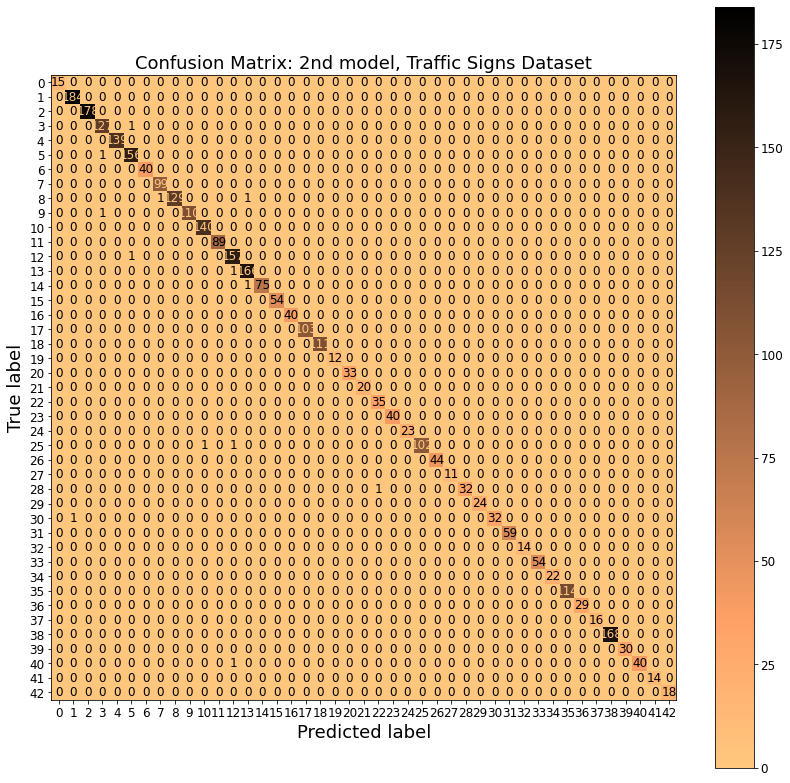

In [26]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline


# Setting default size of the plot
# Setting default fontsize used in the plot
plt.rcParams['figure.figsize'] = (14.0, 14.0)
plt.rcParams['font.size'] = 12


# Implementing visualization of confusion matrix
display_c_m = ConfusionMatrixDisplay(c_m)


# Plotting confusion matrix
# Setting colour map to be used
display_c_m.plot(cmap='copper_r')
# Other possible options for colour map are:
# 'OrRd', 'autumn_r', 'Blues', 'cool', 'Greens', 'Greys', 'PuRd'


# Setting fontsize for xticks and yticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# Setting fontsize for xlabels and ylabels
plt.xlabel('Predicted label', fontsize=18)
plt.ylabel('True label', fontsize=18)


# Giving name to the plot
plt.title('Confusion Matrix: 2nd model, Traffic Signs Dataset', fontsize=18)


# Saving plot
plt.savefig('confusion_matrix_model_2_ts_dataset.png', transparent=True, dpi=500)


# Showing the plot
plt.show()


### Traffic Signs dataset, 2nd model

## Step 5: Testing on one image

In [27]:
# Check points
# Showing shapes of loaded Numpy arrays of
# Mean Image and Standard Deviation
print('RGB Mean Image          :', mean_rgb.shape)
print('RGB Standard Deviation  :', std_rgb.shape)
print('GRAY Mean Image         :', mean_gray.shape)
print('GRAY Standard Deviation :', std_gray.shape)


RGB Mean Image          : (48, 48, 3)
RGB Standard Deviation  : (48, 48, 3)
GRAY Mean Image         : (48, 48, 1)
GRAY Standard Deviation : (48, 48, 1)


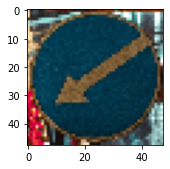

Shape of RGB image         : (48, 48, 3)
Pixels of RGB image        : [241 255 255  59 224]
RGB /255.0                 : [0.94509804 1.         1.         0.23137255 0.87843137]
RGB /255.0 => mean         : [ 0.60176122  0.65742084  0.65846923 -0.10776426  0.54153889]
RGB /255.0 => mean => std  : [ 2.02521376  2.21949877  2.22328337 -0.36518999  1.84338373]



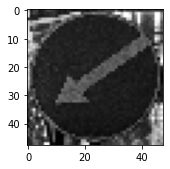

Shape of GRAY image        : (48, 48, 1)
Pixels of GRAY image       : [203 230 227  53 213]
GRAY /255.0                : [0.79607843 0.90196078 0.89019608 0.20784314 0.83529412]
GRAY /255.0 => mean        : [ 0.45802208  0.56465828  0.55407377 -0.12591572  0.50384276]
GRAY /255.0 => mean => std : [ 1.54319292  1.90942816  1.87638775 -0.42814902  1.72145775]


In [29]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (2.5, 2.5)



# Reading image by OpenCV library
# In this way image is opened already as Numpy array
# (!) OpenCV by default reads images in BGR order of channels
# (!) On Windows, it might need to change
# this: + '/' +
# to this: + '\' +
# or to this: + '\\' +
image_ts_bgr = cv2.imread('images_to_test' + '/' + 'ts_to_test_2.jpg')

# Swapping channels from BGR to RGB by OpenCV function
image_ts_rgb = cv2.cvtColor(image_ts_bgr, cv2.COLOR_BGR2RGB)

# Resizing image to 32 by 32 pixels size
image_ts_rgb = cv2.resize(image_ts_rgb,
                              (48, 48),
                              interpolation=cv2.INTER_CUBIC)

# Check point
# Showing loaded and resized image
plt.imshow(image_ts_rgb)
plt.show()



# Implementing normalization by dividing image's pixels on 255.0
image_ts_rgb_255 = image_ts_rgb / 255.0

# Implementing normalization by subtracting Mean Image
image_ts_rgb_255_mean = image_ts_rgb_255 - mean_rgb

# Implementing preprocessing by dividing on Standard Deviation
image_ts_rgb_255_mean_std = image_ts_rgb_255_mean / std_rgb

# Check points
# Showing shape of Numpy array with RGB image
# Showing some pixels' values
print('Shape of RGB image         :', image_ts_rgb.shape)
print('Pixels of RGB image        :', image_ts_rgb[:5, 0, 0])
print('RGB /255.0                 :', image_ts_rgb_255[:5, 0, 0])
print('RGB /255.0 => mean         :', image_ts_rgb_255_mean[:5, 0, 0])
print('RGB /255.0 => mean => std  :', image_ts_rgb_255_mean_std[:5, 0, 0])
print()



# Converting image to GRAY by OpenCV function
image_ts_gray = cv2.cvtColor(image_ts_rgb, cv2.COLOR_RGB2GRAY)

#changed --------------------------------------------------------------------------
plt.imshow(image_ts_gray, cmap=plt.get_cmap('gray'))
plt.show()
# Extending dimension from (height, width) to (height, width, one channel)
image_ts_gray = image_ts_gray[:, :, np.newaxis]

# Check point
# Showing converted into GRAY image




# Implementing normalization by dividing image's pixels on 255.0
image_ts_gray_255 = image_ts_gray / 255.0

# Implementing normalization by subtracting Mean Image
image_ts_gray_255_mean = image_ts_gray_255 - mean_gray

# Implementing preprocessing by dividing on Standard Deviation
image_ts_gray_255_mean_std = image_ts_gray_255_mean / std_gray

# Check points
# Showing shape of Numpy array with GRAY image
# Showing some pixels' values
print('Shape of GRAY image        :', image_ts_gray.shape)
print('Pixels of GRAY image       :', image_ts_gray[:5, 0, 0])
print('GRAY /255.0                :', image_ts_gray_255[:5, 0, 0])
print('GRAY /255.0 => mean        :', image_ts_gray_255_mean[:5, 0, 0])
print('GRAY /255.0 => mean => std :', image_ts_gray_255_mean_std[:5, 0, 0])


In [30]:
# Extending dimension from (height, width, channels) to (1, height, width, channels)
image_ts_rgb_255_mean = image_ts_rgb_255_mean[np.newaxis, :, :, :]
image_ts_rgb_255_mean_std = image_ts_rgb_255_mean_std[np.newaxis, :, :, :]

image_ts_gray_255_mean = image_ts_gray_255_mean[np.newaxis, :, :, :]
image_ts_gray_255_mean_std = image_ts_gray_255_mean_std[np.newaxis, :, :, :]

# Check points
# Showing shapes of extended Numpy arrays
print('RGB /255.0 => mean         :', image_ts_rgb_255_mean.shape)
print('RGB /255.0 => mean => std  :', image_ts_rgb_255_mean_std.shape)
print()
print('GRAY /255.0 => mean        :', image_ts_gray_255_mean.shape)
print('GRAY /255.0 => mean => std :', image_ts_gray_255_mean_std.shape)


RGB /255.0 => mean         : (1, 48, 48, 3)
RGB /255.0 => mean => std  : (1, 48, 48, 3)

GRAY /255.0 => mean        : (1, 48, 48, 1)
GRAY /255.0 => mean => std : (1, 48, 48, 1)


In [31]:
# Check point
# Showing information about created function
print(help(bar_chart))


Help on function bar_chart in module __main__:

bar_chart(scores, bar_title, show_xticks=True, labels=None)
    # Defining function to plot bar chart with scores values

None



Scores shape        : (1, 43)
Scores values       : [2.1830441e-12 0.0000000e+00 2.5212668e-08 1.9788734e-24 1.3081454e-01]
Scores sum          : 1.0
Score of prediction : 0.86919
Class index         : 33
Label               : Turn right ahead
Time                : 0.05336


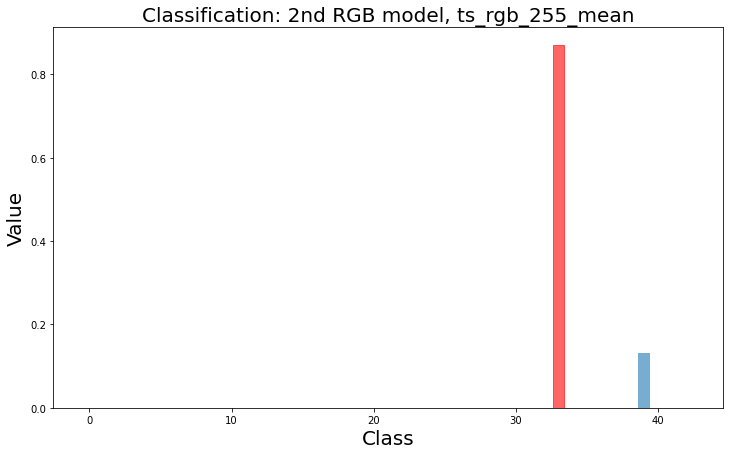


Scores shape        : (1, 43)
Scores values       : [5.5611949e-06 1.2215518e-08 7.7782240e-04 1.5687545e-16 2.0461636e-04]
Scores sum          : 1.0
Score of prediction : 0.99901
Class index         : 33
Label               : Turn right ahead
Time                : 0.04949


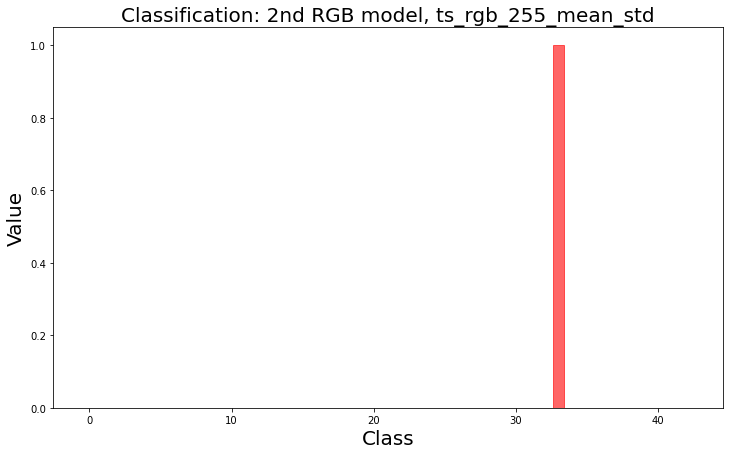


Scores shape        : (1, 43)
Scores values       : [6.4621907e-29 0.0000000e+00 2.1617142e-08 2.1561496e-28 9.9998963e-01]
Scores sum          : 1.0
Score of prediction : 0.99999
Class index         : 39
Label               : Keep left
Time                : 0.04585


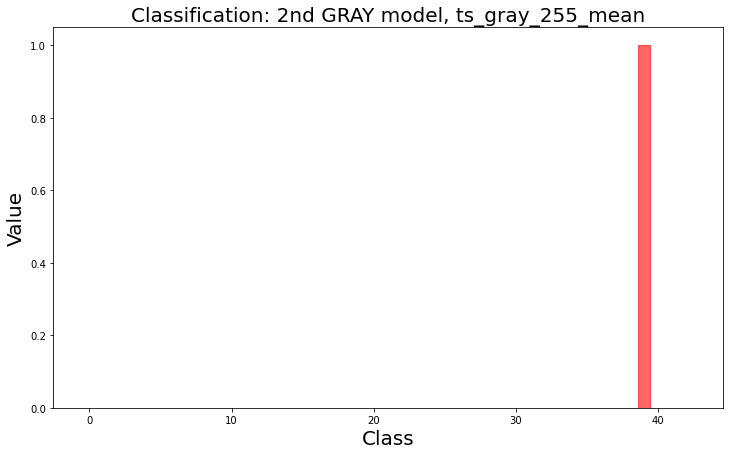


Scores shape        : (1, 43)
Scores values       : [2.7434439e-21 1.2358373e-34 2.1723587e-10 1.0390028e-24 9.9257833e-01]
Scores sum          : 1.0
Score of prediction : 0.99258
Class index         : 39
Label               : Keep left
Time                : 0.04548


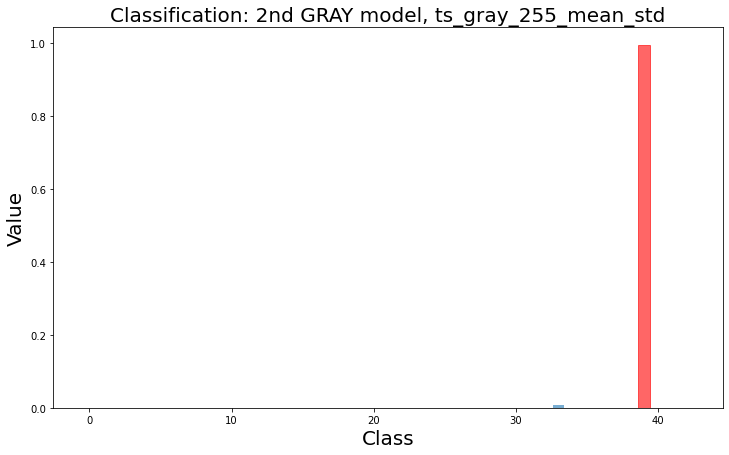

In [32]:
# Magic function that renders the figure in a jupyter notebook
# instead of displaying a figure object
%matplotlib inline

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (12, 7)



# Testing RGB model trained on dataset: dataset_ts_rgb_255_mean.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_rgb[0].predict(image_ts_rgb_255_mean)
end = timer()

# Scores are given as 43 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0, 35:40])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_ts[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='2nd RGB model, ts_rgb_255_mean',
          show_xticks=False)



# Testing RGB model trained on dataset: dataset_ts_rgb_255_mean_std.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_rgb[1].predict(image_ts_rgb_255_mean_std)
end = timer()

# Scores are given as 43 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0, 35:40])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_ts[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='2nd RGB model, ts_rgb_255_mean_std',
          show_xticks=False)



# Testing GRAY model trained on dataset: dataset_ts_gray_255_mean.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_gray[0].predict(image_ts_gray_255_mean)
end = timer()

# Scores are given as 43 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0, 35:40])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_ts[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='2nd GRAY model, ts_gray_255_mean',
          show_xticks=False)



# Testing GRAY model trained on dataset: dataset_ts_gray_255_mean_std.hdf5
# Input image is preprocessed in the same way
# Measuring classification time
start = timer()
scores = model_gray[1].predict(image_ts_gray_255_mean_std)
end = timer()

# Scores are given as 43 numbers of predictions for each class
# Getting only one class with maximum value
prediction = np.argmax(scores)

# Check points
# Showing scores shape and values
# Printing class index, label and time
print()
print('Scores shape        :', scores.shape)
print('Scores values       :', scores[0, 35:40])
print('Scores sum          :', scores[0].sum())
print('Score of prediction : {0:.5f}'.format(scores[0][prediction]))
print('Class index         :', prediction)
print('Label               :', labels_ts[prediction])
print('Time                : {0:.5f}'.format(end - start))

# Plotting bar chart with scores values
bar_chart(scores[0],
          bar_title='2nd GRAY model, ts_gray_255_mean_std',
          show_xticks=False)


### Some comments

To get more details for usage of 'np.argmax':  
**print(help(np.argmax))**
  
More details and examples are here:  
 - https://numpy.org/doc/stable/reference/generated/numpy.argmax.html  
  
  
To get more details for usage of 'classification_report':  
**print(help(classification_report))**
  
More details and examples are here:  
 - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html  
  
  
To get more details for usage of 'confusion_matrix':  
**print(help(confusion_matrix))**
  
More details and examples are here:  
 - https://www.sklearn.org/modules/generated/sklearn.metrics.confusion_matrix.html  
  
  
To get more details for usage of 'plt.colormaps()':  
**print(help(plt.colormaps()))**
  
More details and examples are here:  
 -  https://matplotlib.org/api/pyplot_summary.html?highlight=colormaps#matplotlib.pyplot.colormaps  
  
  
To get more details for usage of 'cv2.resize':  
**print(help(cv2.resize))**
  
More details and examples are here:  
 - https://docs.opencv.org/4.3.0/da/d54/group__imgproc__transform.html  

In [ ]:
from keras.models import Sequential

print(help(Sequential.load_weights))

In [ ]:
from keras.models import Sequential

print(help(Sequential.predict))

In [ ]:
print(help(np.newaxis))

In [ ]:
print(help(np.argmax))

In [ ]:
print(help(classification_report))

In [ ]:
print(help(confusion_matrix))

In [ ]:
print(plt.colormaps())

In [ ]:
print(plt.rcParams.keys())

In [ ]:
print(help(plt.savefig))

In [ ]:
help(plt.bar)

In [ ]:
help(plt.xticks)

In [ ]:
print(help(cv2.resize))